___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import pickle

from sklearn.utils import class_weight, compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc, make_scorer, silhouette_samples, silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from yellowbrick.classifier import ROCAUC, ClassPredictionError
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

import plotly.express as px
from datetime import datetime

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import datetime as dt
from turtle import color

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [3]:
df = pd.read_csv("HR_Dataset.csv")


In [4]:
df.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
Departments,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
print('Percentage of NaN Values:')
print('-------------------------')
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)


Percentage of NaN Values:
-------------------------


satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Departments              0.0
salary                   0.0
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
df.describe().T.style.background_gradient(
    subset=['mean', 'std', '50%', 'count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.000000,0.612834,0.248631,0.090000,0.440000,0.640000,0.820000,1.000000
last_evaluation,14999.000000,0.716102,0.171169,0.360000,0.560000,0.720000,0.870000,1.000000
number_project,14999.000000,3.803054,1.232592,2.000000,3.000000,4.000000,5.000000,7.000000
average_montly_hours,14999.000000,201.050337,49.943099,96.000000,156.000000,200.000000,245.000000,310.000000
time_spend_company,14999.000000,3.498233,1.460136,2.000000,3.000000,3.000000,4.000000,10.000000
Work_accident,14999.000000,0.144610,0.351719,0.000000,0.000000,0.000000,0.000000,1.000000
left,14999.000000,0.238083,0.425924,0.000000,0.000000,0.000000,0.000000,1.000000
promotion_last_5years,14999.000000,0.021268,0.144281,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
df.describe(include=object).T

,count,unique,top,freq
Departments,14999,10,sales,4140
salary,14999,3,low,7316


In [10]:
numerical = df.select_dtypes(exclude='object')
numerical.sample(3)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
12146,0.76,0.92,4,239,5,0,1,0
6512,0.23,0.74,5,219,4,0,0,0
9730,0.53,0.58,4,251,2,0,0,0


In [11]:
categorical = df.select_dtypes(include='object')
categorical.sample(3)


,Departments,salary
11279,technical,low
8635,sales,low
12688,accounting,medium


In [12]:
print('Number of Duplicated Values:', df.duplicated().sum())
print('---------------------------------')

Number of Duplicated Values: 3008
---------------------------------


In [13]:
df.nunique().sort_values(ascending=False)

average_montly_hours     215
satisfaction_level        92
last_evaluation           65
Departments               10
time_spend_company         8
number_project             6
salary                     3
Work_accident              2
left                       2
promotion_last_5years      2
dtype: int64

In [14]:
df.rename({'Departments ': 'department',
          "Work_accident": "work_accident"}, axis=1, inplace=True)
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


According to the basic examinations on the dataset;
We have a classification problem.
We are going to make classification on the target variable "left".
And we will build a model to get the best classification on the "left" column.
Because of that we are going to look at the balance of "left" column.
The dataset has 10 columns and 11991 observations after dropping of duplicated observations.
8 columns contain numerical values and 2 columns contain categorical values.
There seems to be no missing value.

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [16]:
df = df[['satisfaction_level', 'last_evaluation', 'number_project',
'average_montly_hours', 'time_spend_company', 'work_accident',
'promotion_last_5years', 'department', 'salary', 'left']]
df.head(1)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1


I want to move the 'left' column, which is my target column, from where it is to the end. In this way, I will work more comfortably psychologically :))

In [17]:
df_remain = df[df.left == 0]
df_remain.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
2000,0.58,0.74,4,215,3,0,0,sales,low,0
2001,0.82,0.67,2,202,3,0,0,sales,low,0
2002,0.45,0.69,5,193,3,0,0,sales,low,0
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2004,0.49,0.60,3,214,2,0,0,sales,low,0


In [18]:
df_churn = df[df.left == 1]
df_churn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [19]:
df_remain.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.0
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.0
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,0.0
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,0.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,0.0


In [20]:
df_churn.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.0
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,0.0
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.0
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.0
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,1.0
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,1.0
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.0


In [21]:
df_remain.time_spend_company.value_counts()

3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [22]:
df_churn.time_spend_company.value_counts()


3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

In [23]:
df_remain.groupby('time_spend_company').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,work_accident,promotion_last_5years,left
time_spend_company,,,,,,,
2,0.699991,0.717004,3.681291,199.956440,0.174553,0.016923,0.0
3,0.696380,0.717278,3.729463,199.451513,0.169034,0.024501,0.0
4,0.638674,0.721974,3.916017,198.812238,0.163767,0.019196,0.0
5,0.475297,0.699953,4.206250,192.576562,0.206250,0.025000,0.0
6,0.526346,0.693340,4.064833,199.654224,0.190570,0.033399,0.0
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.191489,0.0
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.061728,0.0
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.074766,0.0


In [24]:
df_churn.groupby('time_spend_company').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,work_accident,promotion_last_5years,left
time_spend_company,,,,,,,
2,0.521698,0.753208,4.056604,210.773585,0.018868,0.000000,1.0
3,0.411740,0.520019,2.097730,147.377049,0.046658,0.009458,1.0
4,0.146933,0.854000,5.960674,269.612360,0.050562,0.003371,1.0
5,0.714034,0.901032,4.759904,246.337335,0.046819,0.001200,1.0
6,0.791196,0.904737,4.574163,242.244019,0.047847,0.000000,1.0


In [25]:
df_remain.number_project.value_counts()


3    3983
4    3956
5    2149
2     821
6     519
Name: number_project, dtype: int64

In [26]:
df_churn.number_project.value_counts()

2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64

In [27]:
df_remain.groupby('number_project').mean()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
number_project,,,,,,,
2,0.604397,0.663812,187.125457,3.472594,0.181486,0.030451,0.0
3,0.689618,0.715910,197.119257,3.274416,0.178007,0.023851,0.0
4,0.689181,0.725210,201.305106,3.305612,0.165824,0.028564,0.0
5,0.657971,0.722122,203.094928,3.449046,0.180084,0.023267,0.0
6,0.456570,0.692100,199.017341,4.325626,0.190751,0.032755,0.0


In [28]:
df_churn.groupby('number_project').mean()


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
number_project,,,,,,,
2,0.412948,0.518571,146.310147,3.027441,0.046586,0.007658,1.0
3,0.579861,0.753194,218.986111,3.958333,0.013889,0.000000,1.0
4,0.752689,0.883154,242.041565,4.899756,0.066015,0.009780,1.0
5,0.752337,0.902075,243.547386,5.032680,0.047386,0.000000,1.0
6,0.128366,0.861389,270.132824,4.087023,0.053435,0.004580,1.0
7,0.118711,0.859609,276.078125,4.113281,0.015625,0.000000,1.0


Here i can see that average monthly hour for the churn employees greater than the remaining employees. And also average of promotion last 5 years in churn group is smaller than the remaining group.

In [29]:
pd.DataFrame(df_remain.average_montly_hours.value_counts().sort_index(ascending=False))

,average_montly_hours
287,13
286,28
285,17
284,12
283,12
...,...
100,19
99,11
98,23
97,14


In [30]:
pd.DataFrame(df_churn.average_montly_hours.value_counts().sort_index(ascending=False))

,average_montly_hours
310,18
309,16
308,20
307,14
306,18
...,...
130,42
129,47
128,47
127,57


In [31]:
len(df_churn[(df_churn['average_montly_hours'] > 287)])

330

In [32]:
len(df_remain[(df_remain['average_montly_hours'] > 287)])


0

I can see churn employees working a lot more in a month than the remaining employees

In [33]:
df_remain[df_remain.average_montly_hours > 200]['department'].value_counts(normalize=True)

sales          0.281115
technical      0.173201
support        0.146763
IT             0.080396
product_mng    0.059712
marketing      0.057554
RandD          0.056655
management     0.049460
accounting     0.049101
hr             0.046043
Name: department, dtype: float64

In [34]:
df_churn[df_churn.average_montly_hours > 200]['department'].value_counts(normalize=True)


sales          0.274151
technical      0.211488
support        0.154047
IT             0.080940
product_mng    0.056919
accounting     0.055875
marketing      0.051697
hr             0.051175
RandD          0.036554
management     0.027154
Name: department, dtype: float64

In [35]:
df_remain.promotion_last_5years.value_counts()

0    11128
1      300
Name: promotion_last_5years, dtype: int64

In [36]:
df_remain.promotion_last_5years.value_counts(normalize=True)

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

In [37]:
df_churn.promotion_last_5years.value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [38]:
df_churn.promotion_last_5years.value_counts(normalize=True)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

In [39]:
print('Percentage of churn employees promoted in the last five years    : %',
      round(df_churn.promotion_last_5years.value_counts(normalize=True)[1]*100, 2))
print('Percentage of remaining employees promoted in the last five years: %',
      df_remain.promotion_last_5years.value_counts(normalize=True)[1]*100)


Percentage of churn employees promoted in the last five years    : % 0.53
Percentage of remaining employees promoted in the last five years: % 2.6251312565628284


Percentage of churn employees promoted in the last five years smaller than the percentage of remaining employees.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [40]:
df['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

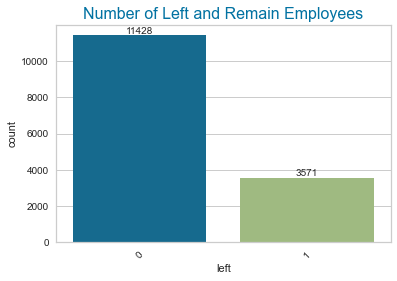

In [41]:
ax = sns.countplot(data=df, x='left')
ax.set_title('Number of Left and Remain Employees', fontsize=16, color='b')
ax.tick_params(axis='x', rotation=45)
for container in ax.containers:
    ax.bar_label(container)

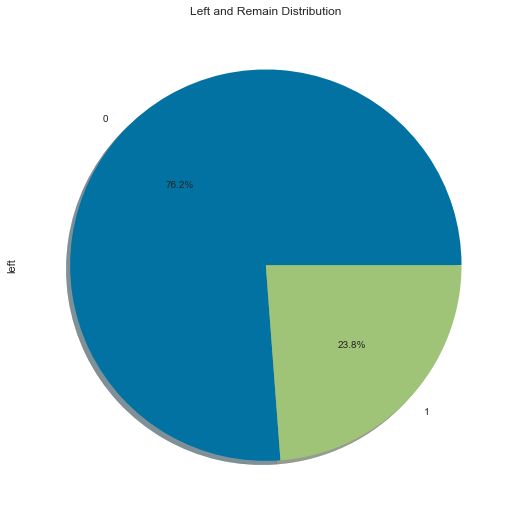

In [42]:
plt.figure(figsize=(20, 9))
df.left.value_counts().plot(
    kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Left and Remain Distribution')
plt.show()


'left' column has binary type values. We have an imbalanced data.
Almost 17% (1991 employees) of the employees didn't continue with the company and left.
Almost 83% (10000 employees) of the employees continue with the company and didn't leave.

Promotion Status

In [43]:
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [44]:
df.groupby('left')['promotion_last_5years'].value_counts()

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
Name: promotion_last_5years, dtype: int64

In [45]:
df.groupby('left')['promotion_last_5years'].value_counts(normalize=True)

left  promotion_last_5years
0     0                        0.973749
      1                        0.026251
1     0                        0.994679
      1                        0.005321
Name: promotion_last_5years, dtype: float64

Percentage of churn employees promoted in the last five years smaller than the percentage of remaining employees. This can be a reason why employees leave firm.

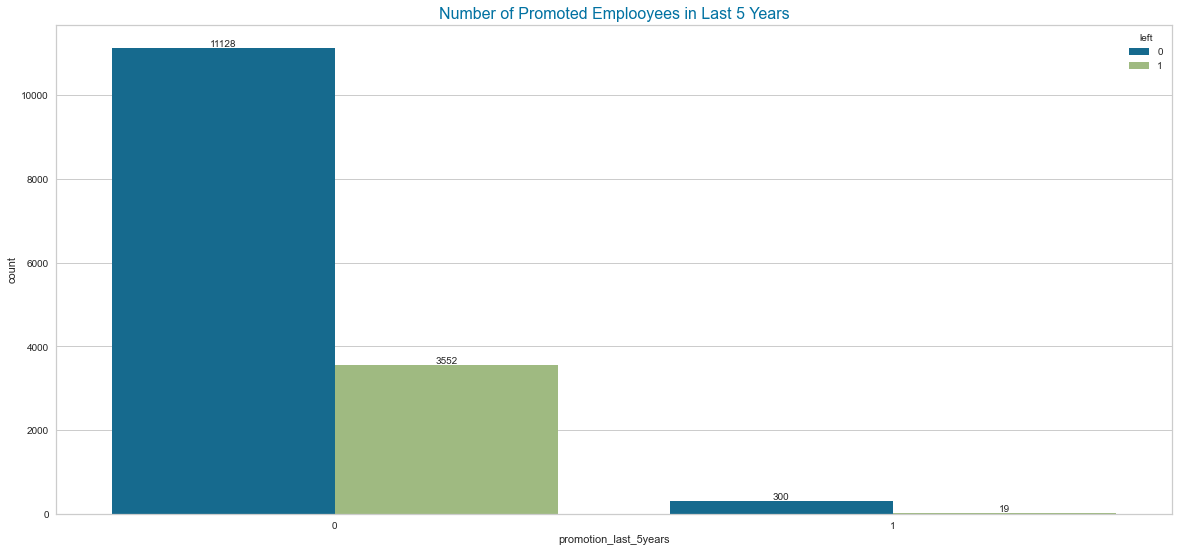

In [46]:
plt.figure(figsize=(20, 9))
ax = sns.countplot(data=df, x='promotion_last_5years', hue='left')
ax.set_title('Number of Promoted Emplooyees in Last 5 Years', fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)

years of experience

In [47]:
df.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [48]:
df.groupby('left')['time_spend_company'].value_counts()

left  time_spend_company
0     3                     4857
      2                     3191
      4                     1667
      5                      640
      6                      509
      10                     214
      7                      188
      8                      162
1     3                     1586
      4                      890
      5                      833
      6                      209
      2                       53
Name: time_spend_company, dtype: int64

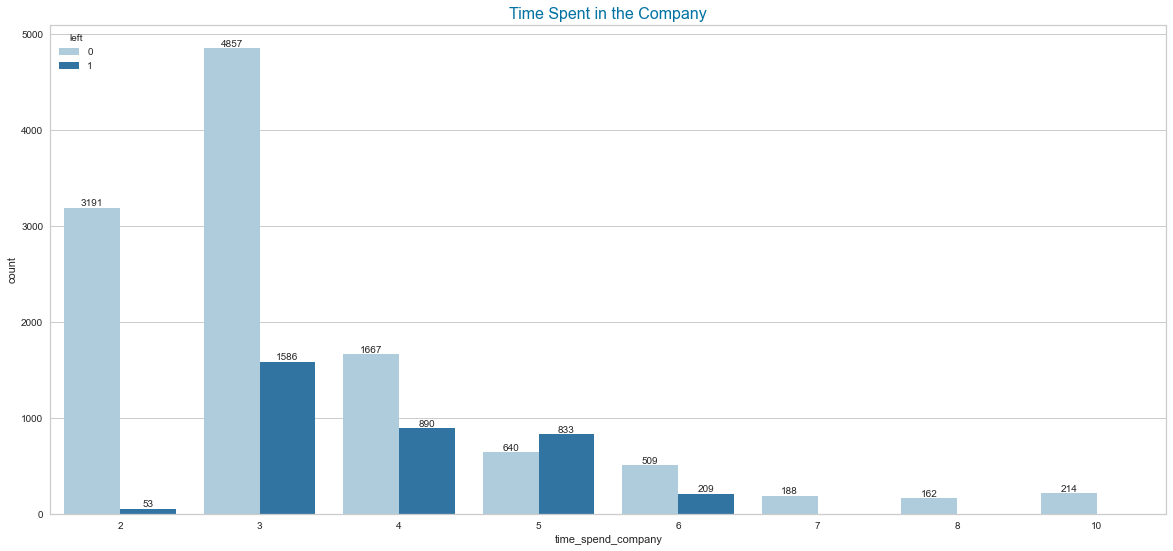

In [49]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='time_spend_company', hue='left', palette=palette)
ax.set_title('Time Spent in the Company',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

Generally, those who work between the 2nd and 6th years leave the company, especially in their 3rd year.

In [50]:
df[(df['time_spend_company'] == 3)][['satisfaction_level', 'last_evaluation']].mean()


satisfaction_level    0.626314
last_evaluation       0.668721
dtype: float64

In [51]:
df[(df['time_spend_company'] == 3)].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.69638,0.717278,3.729463,199.451513,3.0,0.169034,0.024501
1,0.41174,0.520019,2.097730,147.377049,3.0,0.046658,0.009458


In [52]:
df[(df['time_spend_company'] == 4)].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.638674,0.721974,3.916017,198.812238,4.0,0.163767,0.019196
1,0.146933,0.854000,5.960674,269.612360,4.0,0.050562,0.003371


In [53]:
df[(df['time_spend_company'] == 5)].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.475297,0.699953,4.206250,192.576562,5.0,0.206250,0.0250
1,0.714034,0.901032,4.759904,246.337335,5.0,0.046819,0.0012


For two groups; The noticeable difference in the 3rd, 4th and 5th years is the promotion difference in the last five years. In the 4th and 5th years, the average monthly working hours of churn employees are higher.

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [54]:
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

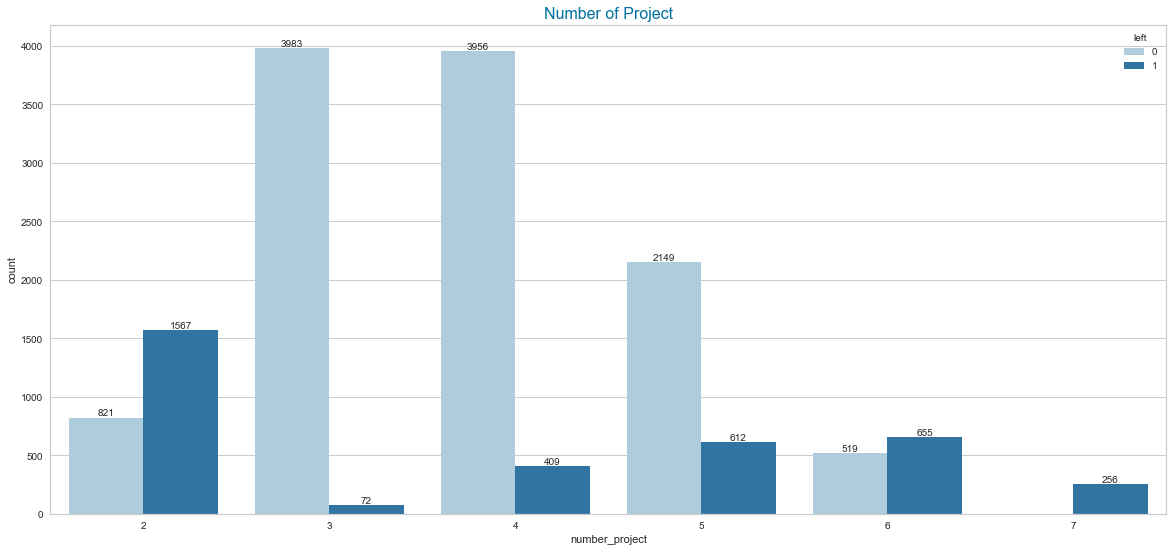

In [55]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='number_project',
                   hue='left', palette=palette)
ax.set_title('Number of Project',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [56]:
df.groupby('left')['number_project'].value_counts(normalize=True)


left  number_project
0     3                 0.348530
      4                 0.346167
      5                 0.188047
      2                 0.071841
      6                 0.045415
1     2                 0.438813
      6                 0.183422
      5                 0.171381
      4                 0.114534
      7                 0.071689
      3                 0.020162
Name: number_project, dtype: float64

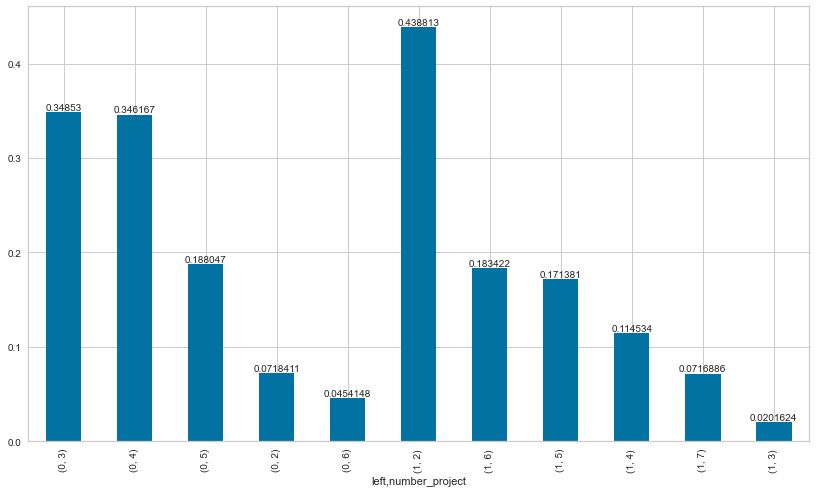

In [57]:
ax = df.groupby('left')['number_project'].value_counts(normalize=True).plot(kind='bar', figsize=(14,8))
for container in ax.containers:ax.bar_label(container)
plt.show()

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


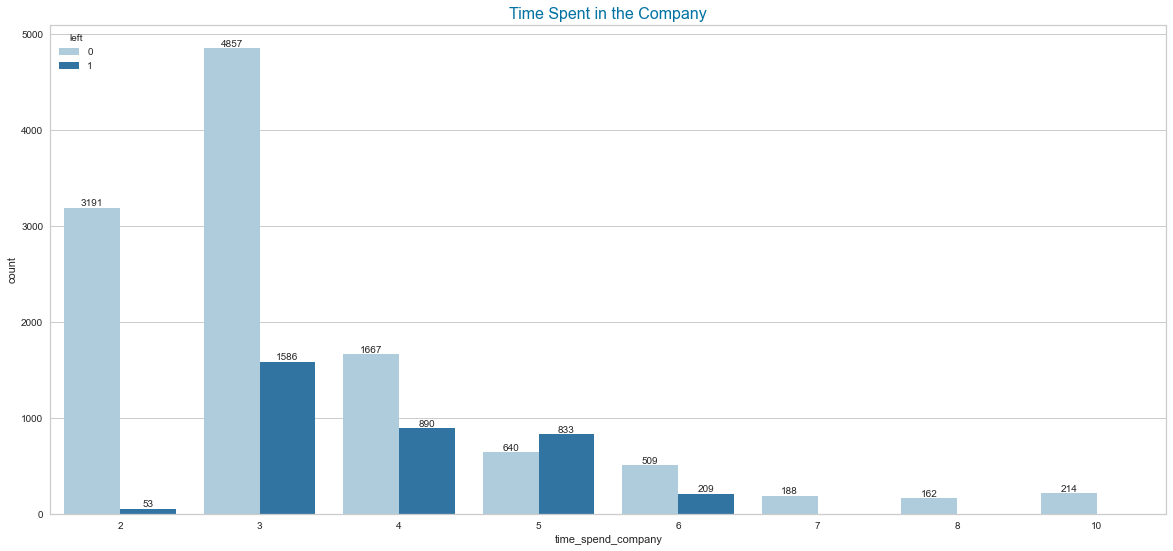

In [58]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='time_spend_company',
                   hue='left', palette=palette)
ax.set_title('Time Spent in the Company',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()
# I already had it above

### Subplots of Features

You can use the methods of the matplotlib.

In [59]:
df.groupby('left')['salary'].value_counts()

left  salary
0     low       5144
      medium    5129
      high      1155
1     low       2172
      medium    1317
      high        82
Name: salary, dtype: int64

In [60]:
df.groupby('left')['salary'].value_counts(normalize=True)

left  salary
0     low       0.450123
      medium    0.448810
      high      0.101068
1     low       0.608233
      medium    0.368804
      high      0.022963
Name: salary, dtype: float64

Salary can be a reason too for the emplooyes to leave the company.

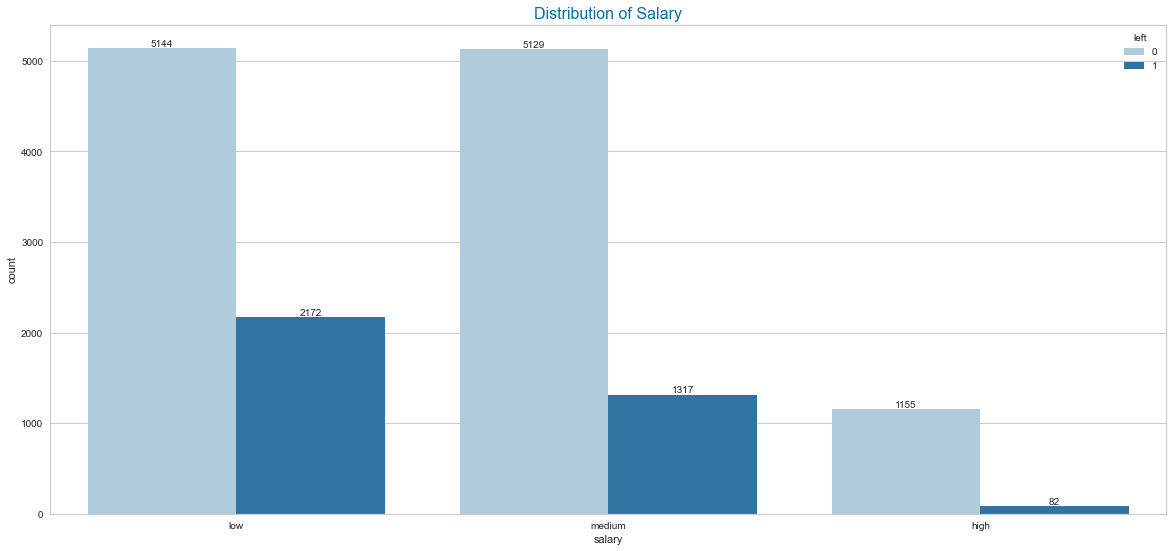

In [61]:
plt.figure(figsize=(20, 9))
palette = sns.color_palette('Paired')
ax = sns.countplot(data=df, x='salary',
                   hue='left', palette=palette)
ax.set_title('Distribution of Salary',
             fontsize=16, color='b')

for container in ax.containers:
    ax.bar_label(container)
plt.show()


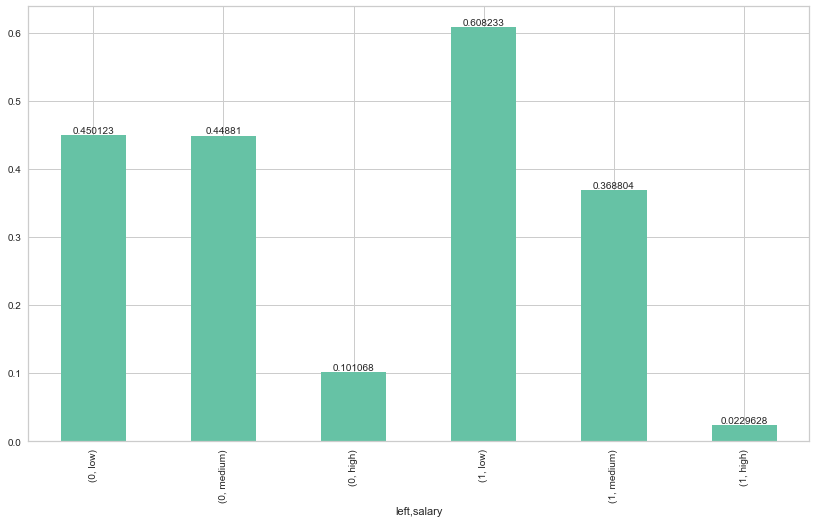

In [62]:
ax = df.groupby('left')['salary'].value_counts(
    normalize=True).plot(kind='bar', figsize=(14, 8), colormap='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


(0.0, 100.0)

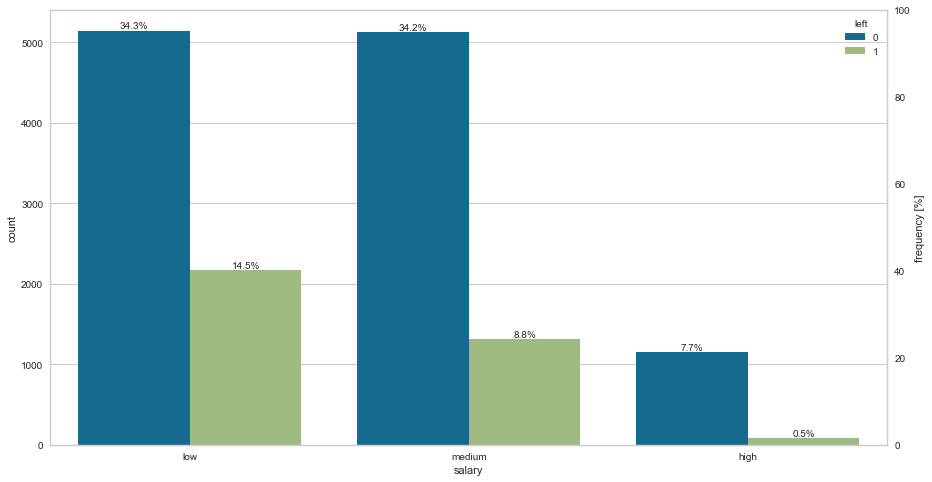

In [63]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='salary', hue='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0, 100)


average monthly hours:

In [64]:
df.groupby('left')['average_montly_hours'].mean()


left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

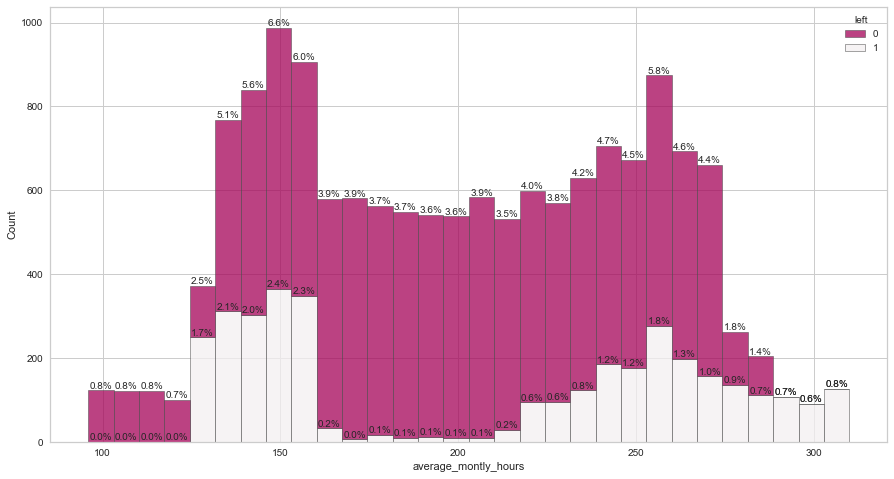

In [65]:
plt.figure(figsize=(15, 8))
fig = sns.histplot(
    df,
    x="average_montly_hours", hue="left",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
for p in fig.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text


## Tendency to left regarding work load has five phases

Below 125 hours/month there is no churn
125-160 hours/month churn rate is highest
160-220 hours/month churn rate very low(neglectable)
220-290 hours/month churn rate high(has a bell shape)
Over 220 hours/month churn rate % 100!!!


## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [66]:
df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


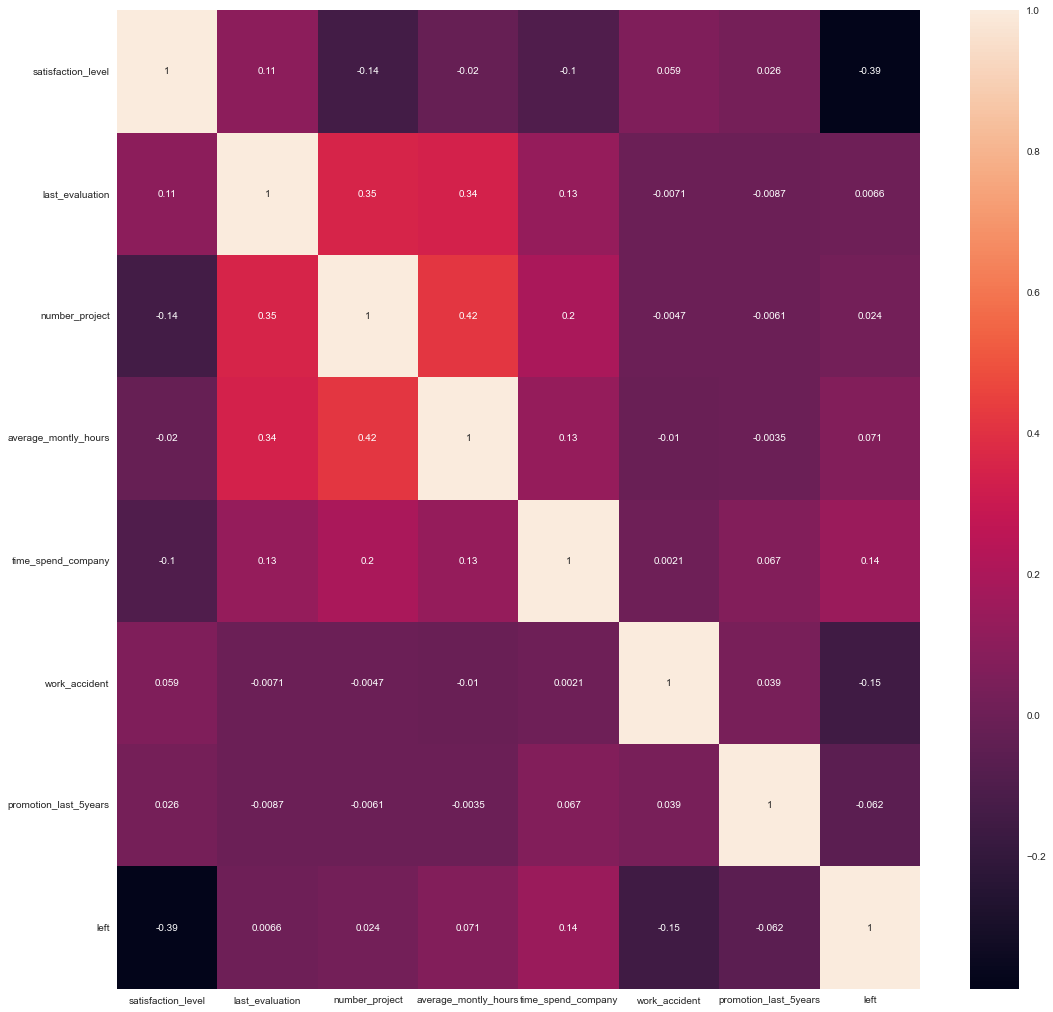

In [67]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0)
plt.show()


In [68]:
def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


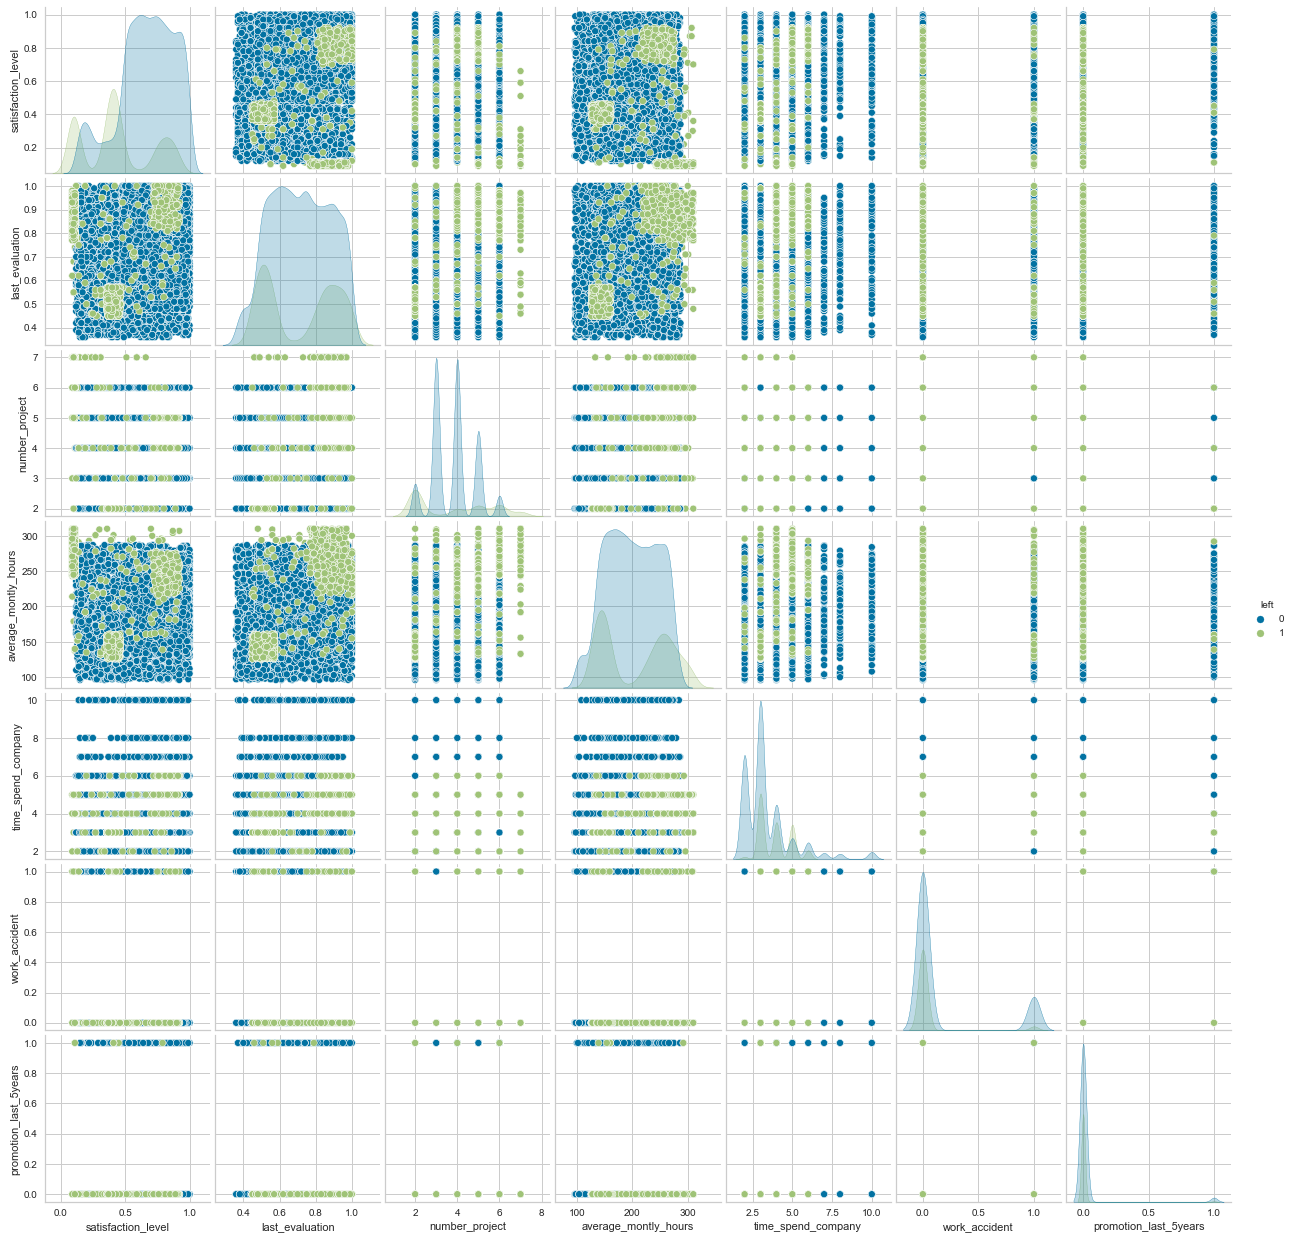

In [69]:
sns.pairplot(data=df, hue='left')


PCA

In [70]:
scaler = StandardScaler()


In [71]:
df_num = df.select_dtypes(exclude='object')
df_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1
14995,0.37,0.48,2,160,3,0,0,1
14996,0.37,0.53,2,143,3,0,0,1
14997,0.11,0.96,6,280,4,0,0,1


In [72]:
df_num.drop(['work_accident', 'left', 'promotion_last_5years'], axis=1, inplace=True)


In [73]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14999 non-null  float64
 1   last_evaluation       14999 non-null  float64
 2   number_project        14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 586.0 KB


In [74]:
df_num_sca = scaler.fit_transform(df_num)


Text(0, 0.5, 'Variance Ratio')

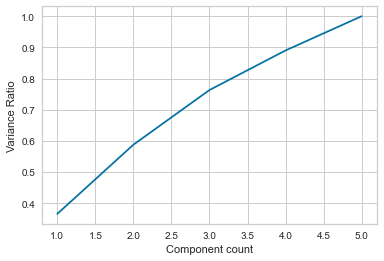

In [75]:
pca = PCA().fit(df_num_sca)
x = range(1, 6) # sonuncusu exclusive
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")


In [76]:
pca = PCA(n_components=3).fit_transform(df_num_sca)


In [77]:
df_pca = pd.DataFrame(pca)
df_pca = df_pca.rename(columns={0: "first_component", 1: "second_component", 2: "third_component"})
df_pca['left'] = df['left']
df_pca.head()


,first_component,second_component,third_component,left
0,-1.908716,0.996479,-0.173213,1
1,2.130139,-0.329510,1.291706,1
2,3.051471,1.572354,-1.335000,1
3,1.544444,-0.246191,0.779158,1
4,-1.912868,1.046541,-0.201512,1


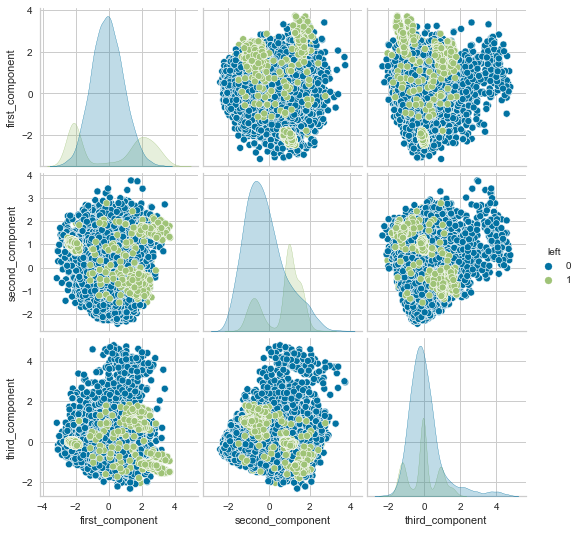

In [78]:
sns.pairplot(data=df_pca, hue='left')

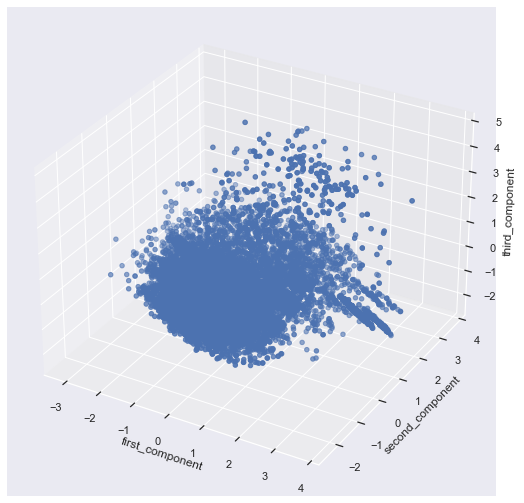

In [79]:
#df = pd.read_csv('2016.csv')
sns.set(style="darkgrid")

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111, projection='3d')

x = df_pca['first_component']
y = df_pca['second_component']
z = df_pca['third_component']

ax.set_xlabel("first_component")
ax.set_ylabel("second_component")
ax.set_zlabel("third_component")

ax.scatter(x, y, z)

plt.show()


In [80]:
fig = px.scatter_3d(df_pca, x='first_component', y='second_component', z='third_component',
                    color='left')
fig.show()


#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [81]:
df['salary'] = df['salary'].map({'medium': 1, 'high': 2, 'low': 0})


In [82]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
1124,0.43,0.52,2,141,3,0,0,technical,1,1
4461,0.52,0.63,3,225,3,0,0,hr,1,0
14745,0.75,0.85,5,240,6,1,0,marketing,1,1
12454,0.09,0.97,7,254,4,1,0,RandD,1,1
13364,0.37,0.69,2,146,3,0,0,support,1,0


In [83]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [84]:
df1= df.copy()

In [85]:
df1 = df1.drop(columns=['left', 'work_accident', 'promotion_last_5years', 'department'])


In [86]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary
0,0.38,0.53,2,157,3,0
1,0.80,0.86,5,262,6,1
2,0.11,0.88,7,272,4,1
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0


In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14999 non-null  float64
 1   last_evaluation       14999 non-null  float64
 2   number_project        14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   salary                14999 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 703.2 KB


In [88]:
scaler = MinMaxScaler()
scaler.fit(df1)
df1_scaled= scaler.transform(df1)

In [89]:
df1_scaled

array([[0.31868132, 0.265625  , 0.        , 0.28504673, 0.125     ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , 0.77570093, 0.5       ,
        0.5       ],
       [0.02197802, 0.8125    , 1.        , 0.82242991, 0.25      ,
        0.5       ],
       ...,
       [0.30769231, 0.265625  , 0.        , 0.21962617, 0.125     ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , 0.85981308, 0.25      ,
        0.        ],
       [0.30769231, 0.25      , 0.        , 0.28971963, 0.125     ,
        0.        ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

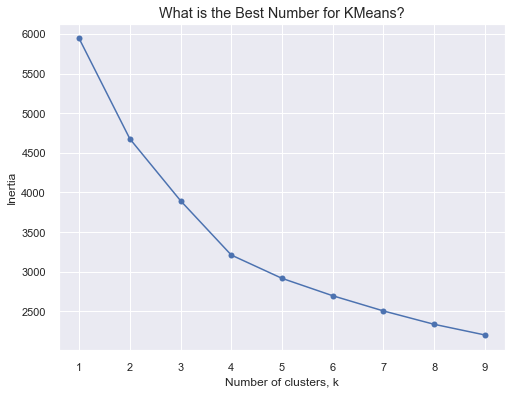

In [90]:
ks = range(1, 10)
inertias = []
for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(df1_scaled)
    inertias.append(kc.inertia_)

f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

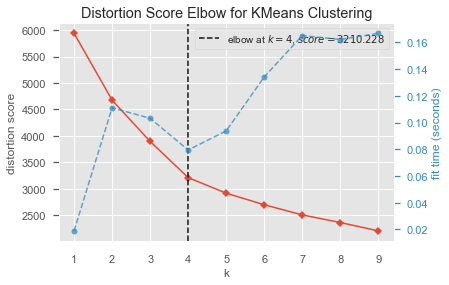

In [91]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(1, 10))
visu.fit(df1_scaled)
visu.show();

In [92]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
    print(
        f'Silhouette Score for {k} clusters: {silhouette_score(df1_scaled, model.labels_)}')


Silhouette Score for 2 clusters: 0.21750112159507037
Silhouette Score for 3 clusters: 0.24363185656278363
Silhouette Score for 4 clusters: 0.25284649531206027
Silhouette Score for 5 clusters: 0.23214374710177216
Silhouette Score for 6 clusters: 0.22054416037580216
Silhouette Score for 7 clusters: 0.2296115615843638
Silhouette Score for 8 clusters: 0.23910664551683017
Silhouette Score for 9 clusters: 0.23449566148332346


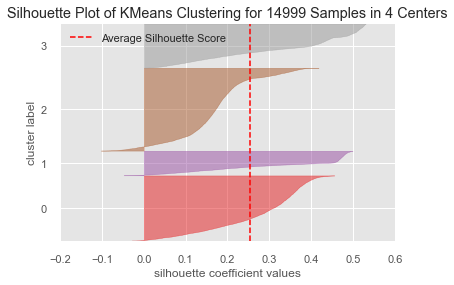

In [93]:
model = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df1_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [94]:
k_means_model = KMeans(n_clusters=4, random_state=101)
k_means_model.fit_predict(df1_scaled)

array([3, 2, 1, ..., 3, 1, 3])

In [95]:
df['pred_clusters'] = k_means_model.labels_
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left,pred_clusters
0,0.38,0.53,2,157,3,0,0,sales,0,1,3
1,0.80,0.86,5,262,6,0,0,sales,1,1,2
2,0.11,0.88,7,272,4,0,0,sales,1,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,0,sales,0,1,3


In [96]:
df.pred_clusters.value_counts()

2    5732
0    4515
3    3054
1    1698
Name: pred_clusters, dtype: int64

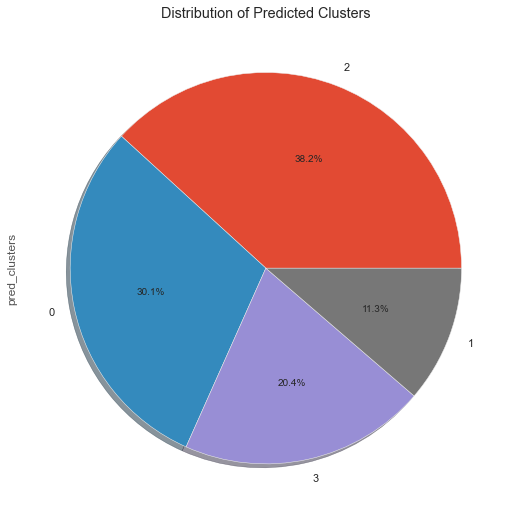

In [97]:
plt.figure(figsize=(20, 9))
df.pred_clusters.value_counts().plot(
    kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Predicted Clusters')
plt.show()


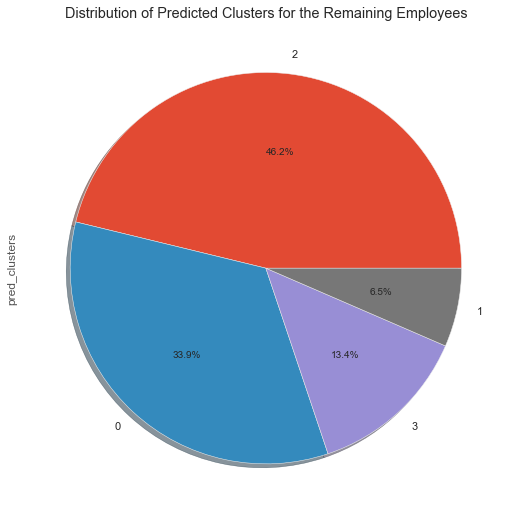

In [98]:
plt.figure(figsize=(20, 9))
df[df['left'] == 0]['pred_clusters'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Predicted Clusters for the Remaining Employees')
plt.show()

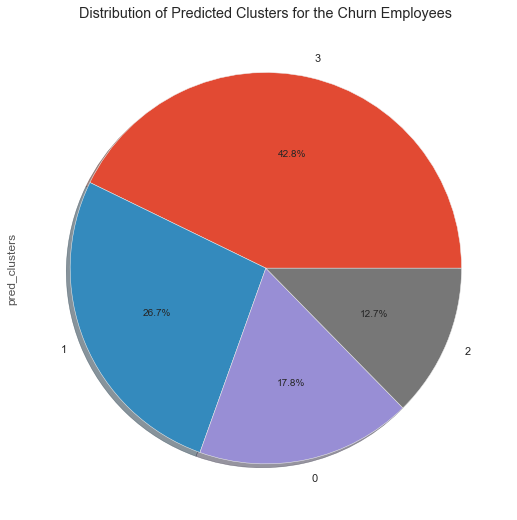

In [99]:
plt.figure(figsize=(20, 9))
df[df['left'] == 1]['pred_clusters'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Predicted Clusters for the Churn Employees')
plt.show()


<AxesSubplot:xlabel='left'>

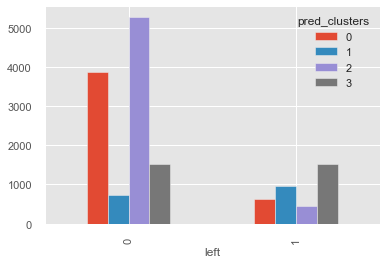

In [100]:
pd.crosstab(df['left'],
            df['pred_clusters']).plot(kind="bar")

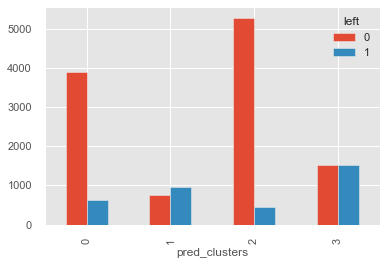

In [101]:
pd.crosstab(df['pred_clusters'],
            df['left']).plot(kind="bar");

In [102]:
df.groupby(['left', 'pred_clusters']).mean()


satisfaction_level  last_evaluation  number_project  \
left pred_clusters                                                        
0    0                        0.749234         0.751738        3.820572   
     1                        0.224913         0.757187        5.028264   
     2                        0.722871         0.733525        3.780682   
     3                        0.478473         0.540524        3.116645   
1    0                        0.788569         0.894607        4.443396   
     1                        0.114576         0.860859        6.173822   
     2                        0.754403         0.865265        4.280973   
     3                        0.405530         0.511904        2.035995   

                    average_montly_hours  time_spend_company  work_accident  \
left pred_clusters                                                            
0    0                        205.309358            3.133797       0.179685   
     1                        216.959623            4.615074       0.189771   
     2                        202.971780            3.387879       0.164962   
     3                        160.925950            3.377457       0.190695   
1    0                        240.660377            4.996855       0.028302   
     1                        272.537173            4.085864       0.046073   
     2                        234.099558            4.741150       0.068584   
     3                        144.992147            3.023560       0.049738   

                    promotion_last_5years    salary  
left pred_clusters                                   
0    0                           0.009281  0.000000  
     1                           0.014805  0.567968  
     2                           0.039583  1.209659  
     3                           0.028834  0.412844  
1    0                           0.004717  0.000000  
     1                           0.003141  0.414660  
     2                           0.002212  1.115044  
     3                           0.007853  0.380236

## 5. Model Building

### Split Data as Train and Test Set

In [103]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left,pred_clusters
0,0.38,0.53,2,157,3,0,0,sales,0,1,3


In [104]:
df2 = df.drop('pred_clusters', axis=1)
df2.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1


In [105]:
X = df2.drop('left', axis=1)
y = df2['left']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=101)


In [107]:
cat = X_train.select_dtypes("object").columns
cat


Index(['department'], dtype='object')

## Logistic Model

In [108]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [109]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder=MinMaxScaler())


In [110]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)


In [111]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)


Test_Set
[[1704  582]
 [ 125  589]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.50      0.82      0.62       714

    accuracy                           0.76      3000
   macro avg       0.72      0.79      0.73      3000
weighted avg       0.83      0.76      0.78      3000


Train_Set
[[6786 2356]
 [ 581 2276]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9142
           1       0.49      0.80      0.61      2857

    accuracy                           0.76     11999
   macro avg       0.71      0.77      0.71     11999
weighted avg       0.82      0.76      0.77     11999



EDA'dan özellikle PCA sonucunda eger cok griftlik varsa logistik regression a uyumlu degil diyebiliriz. bu yüzden eda ve yorumlari önemli

In [112]:
scoring = {"precision_churn": make_scorer(precision_score, labels=1),
           "recall_churn": make_scorer(recall_score, labels=1),
           "f1_churn": make_scorer(f1_score, labels=1)}


Cross Validation For Logistic Model

In [113]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_churn     0.489283
train_precision_churn    0.490837
test_recall_churn        0.794539
train_recall_churn       0.796484
test_f1_churn            0.605589
train_f1_churn           0.607375
dtype: float64

### Logistic Model GridsearchCV

In [114]:
recall_churn = make_scorer(recall_score, average=None, labels=1)


In [115]:
param_grid = {
    "log__C": [0.01, 0.1, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['saga', 'sag' 'liblinear', 'lbfgs'],
}


In [116]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_churn,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)


In [117]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['department'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.01, 0.1, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['saga', 'sagliblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=3)

In [118]:
log_model_grid.best_estimator_


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [119]:
log_model_grid.best_params_


{'log__C': 0.01, 'log__penalty': 'l1', 'log__solver': 'saga'}

In [120]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)


Test_Set
[[1698  588]
 [ 173  541]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2286
           1       0.48      0.76      0.59       714

    accuracy                           0.75      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.81      0.75      0.76      3000


Train_Set
[[6782 2360]
 [ 813 2044]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9142
           1       0.46      0.72      0.56      2857

    accuracy                           0.74     11999
   macro avg       0.68      0.73      0.69     11999
weighted avg       0.79      0.74      0.75     11999



Model fitting with best parameters

In [121]:
operations = [("OneHotEncoder", column_trans), ("log_model_grid", LogisticRegression(class_weight='balanced', max_iter=10000,
                                                                                     random_state=101, C= 0.01, penalty= 'l1', solver= 'saga'))]

pipe_log_model_tuned = Pipeline(steps=operations)

In [122]:
pipe_log_model_tuned.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['department'], dtype='object'))])),
                ('log_model_grid',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [123]:
eval_metric(pipe_log_model_tuned, X_train, y_train, X_test, y_test)


Test_Set
[[1698  588]
 [ 173  541]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      2286
           1       0.48      0.76      0.59       714

    accuracy                           0.75      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.81      0.75      0.76      3000


Train_Set
[[6782 2360]
 [ 813 2044]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9142
           1       0.46      0.72      0.56      2857

    accuracy                           0.74     11999
   macro avg       0.68      0.73      0.69     11999
weighted avg       0.79      0.74      0.75     11999



Prediction Logistic Regression

In [124]:
y_pred = pipe_log_model_tuned.predict(X_test)
y_train_pred = pipe_log_model_tuned.predict(X_train)

LOG_tuned_f1 = f1_score(y_test, y_pred)
LOG_tuned_acc = accuracy_score(y_test, y_pred)
LOG_tuned_recall = recall_score(y_test, y_pred)
LOG_tuned_auc = roc_auc_score(y_test, y_pred)

In [125]:
Log_Pred = {"Actual": y_test, "Log_Pred": y_pred}
Log_Pred = pd.DataFrame.from_dict(Log_Pred)
Log_Pred.head()


,Actual,Log_Pred
2605,0,0
1396,1,1
6863,0,0
949,1,1
4982,0,1


In [126]:
Model_Preds = Log_Pred
Model_Preds.head()


,Actual,Log_Pred
2605,0,0
1396,1,1
6863,0,0
949,1,1
4982,0,1


## Gradient Boosting Classifier

#### Model Building

In [127]:
column_trans2 = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat),
                                        remainder='passthrough')


In [128]:
operations = [("OrdinalEncoder", column_trans2),
              ("grad", GradientBoostingClassifier(random_state=101))]

pipe_grad_model = Pipeline(steps=operations)

In [129]:
pipe_grad_model.fit(X_train, y_train)
eval_metric(pipe_grad_model, X_train, y_train, X_test, y_test)


Test_Set
[[2257   29]
 [  42  672]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.94      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9069   73]
 [ 197 2660]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.97      0.93      0.95      2857

    accuracy                           0.98     11999
   macro avg       0.98      0.96      0.97     11999
weighted avg       0.98      0.98      0.98     11999



GradientBoosting Cross Validation

In [130]:
operations = [("OrdinalEncoder", column_trans2), ("grad", GradientBoostingClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_churn     0.968191
train_precision_churn    0.972157
test_recall_churn        0.929655
train_recall_churn       0.931397
test_f1_churn            0.948416
train_f1_churn           0.951339
dtype: float64

GradientBoosting GridsearchCV

In [131]:
operations = [("OrdinalEncoder", column_trans2),
              ("GB", GradientBoostingClassifier(random_state=101))]


pipe_gb_gs = Pipeline(steps=operations)
pipe_gb_gs


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('GB', GradientBoostingClassifier(random_state=101))])

In [132]:
pipe_gb_gs.get_params()


{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['department'], dtype='object'))])),
  ('GB', GradientBoostingClassifier(random_state=101))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  Index(['department'], dtype='object'))]),
 'GB': GradientBoostingClassifier(random_state=101),
 'OrdinalEncoder__n_jobs': None,
 'OrdinalEncoder__remainder': 'passthrough',
 'OrdinalEncoder__sparse_threshold': 0.3,
 'OrdinalEncoder__transfo

In [133]:
param_grid = {"GB__n_estimators":[50, 100, 200], "GB__subsample":[0.8, 1,  1.2], "GB__max_features" : [None, 'auto'], 
              "GB__learning_rate": [0.05, 0.01, 0.15], 'GB__max_depth':[2,3,4]} 

In [134]:
grad_model_grid = GridSearchCV(pipe_gb_gs,
                              param_grid,
                              verbose=3,
                              scoring=recall_churn,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)


In [135]:
grad_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['department'], dtype='object'))])),
                                       ('GB',
                                        GradientBoostingClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB__learning_rate': [0.05, 0.01, 0.15],
                         'GB__max_depth': [2, 3, 4],
                         'GB__max_features': [None, 'auto'],
                         'GB__n_estimators': [50, 100, 200],
                         'GB__subsample': [0.8, 1, 1.2]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=3)

In [136]:
grad_model_grid.best_estimator_


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('GB',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=2,
                                            n_estimators=50, random_state=101,
                                            subsample=0.8))])

In [137]:
grad_model_grid.best_params_


{'GB__learning_rate': 0.05,
 'GB__max_depth': 2,
 'GB__max_features': None,
 'GB__n_estimators': 50,
 'GB__subsample': 0.8}

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [138]:
print("GB_Grid_Model")
print("------------------")
eval_metric(grad_model_grid, X_train, y_train, X_test, y_test)


GB_Grid_Model
------------------
Test_Set
[[2224   62]
 [ 183  531]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2286
           1       0.90      0.74      0.81       714

    accuracy                           0.92      3000
   macro avg       0.91      0.86      0.88      3000
weighted avg       0.92      0.92      0.92      3000


Train_Set
[[8910  232]
 [ 811 2046]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9142
           1       0.90      0.72      0.80      2857

    accuracy                           0.91     11999
   macro avg       0.91      0.85      0.87     11999
weighted avg       0.91      0.91      0.91     11999



Model fitting with best parameters


In [139]:
operations = [("OrdinalEncoder", column_trans2), ("gradlast", GradientBoostingClassifier(learning_rate= 0.05,
                                                                                       max_depth= 2,
                                                                                       max_features= None,
                                                                                       n_estimators= 50,
                                                                                       subsample= 0.8))]

grad_last = Pipeline(steps=operations)
grad_last

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('gradlast',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=2,
                                            n_estimators=50, subsample=0.8))])

In [140]:
grad_last.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('gradlast',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=2,
                                            n_estimators=50, subsample=0.8))])

In [141]:
eval_metric(grad_last, X_train, y_train, X_test, y_test)

Test_Set
[[2224   62]
 [ 183  531]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2286
           1       0.90      0.74      0.81       714

    accuracy                           0.92      3000
   macro avg       0.91      0.86      0.88      3000
weighted avg       0.92      0.92      0.92      3000


Train_Set
[[8908  234]
 [ 811 2046]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9142
           1       0.90      0.72      0.80      2857

    accuracy                           0.91     11999
   macro avg       0.91      0.85      0.87     11999
weighted avg       0.91      0.91      0.91     11999



- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

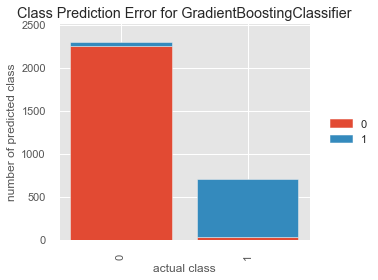

In [142]:
visualizer = ClassPredictionError(pipe_grad_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

Gradient Boosting Classifier ROC (Receiver Operating Curve) and AUC (Area Under Curve)

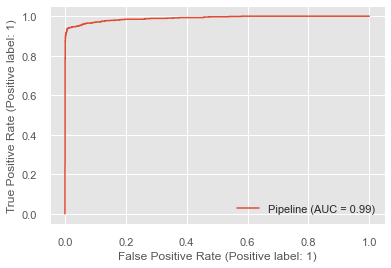

In [143]:
plot_roc_curve(pipe_grad_model, X_test, y_test)

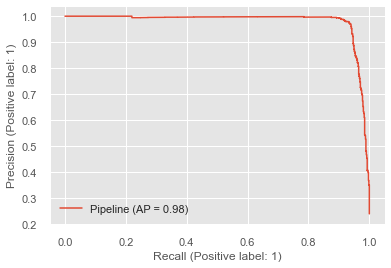

In [144]:
plot_precision_recall_curve(pipe_grad_model, X_test, y_test)

cGB Feature Importance

In [145]:
pipe_grad_model["grad"].feature_importances_

array([0.00060033, 0.53340823, 0.10391549, 0.11182464, 0.06423787,
       0.1828718 , 0.00155721, 0.        , 0.00158442])

In [146]:
features = pipe_grad_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__department', 'remainder__satisfaction_level',
       'remainder__last_evaluation', 'remainder__number_project',
       'remainder__average_montly_hours', 'remainder__time_spend_company',
       'remainder__work_accident', 'remainder__promotion_last_5years',
       'remainder__salary'], dtype=object)

In [147]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
9355,0.70,0.66,4,168,3,0,0,technical,0
8808,0.33,0.95,4,280,3,0,0,accounting,1
11737,0.69,0.66,3,215,6,0,0,sales,2
8741,0.50,0.67,2,142,3,0,0,technical,0
2143,0.88,0.68,5,157,4,1,0,marketing,1


In [148]:
pd.DataFrame(pipe_grad_model["OrdinalEncoder"].fit_transform(
    X_train), columns=features).head()

,ordinalencoder__department,remainder__satisfaction_level,remainder__last_evaluation,remainder__number_project,remainder__average_montly_hours,remainder__time_spend_company,remainder__work_accident,remainder__promotion_last_5years,remainder__salary
0,9.0,0.70,0.66,4.0,168.0,3.0,0.0,0.0,0.0
1,2.0,0.33,0.95,4.0,280.0,3.0,0.0,0.0,1.0
2,7.0,0.69,0.66,3.0,215.0,6.0,0.0,0.0,2.0
3,9.0,0.50,0.67,2.0,142.0,3.0,0.0,0.0,0.0
4,5.0,0.88,0.68,5.0,157.0,4.0,1.0,0.0,1.0


In [149]:
new_features = [i.replace("ordinalencoder__", "").replace(
    "remainder__", "") for i in features]
new_features

['department',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'salary']

In [150]:
GB_fi = pd.DataFrame(data=pipe_grad_model["grad"].feature_importances_, index=new_features,  # index=X.columns
                      columns=["GB_Feature Importance"]).sort_values("GB_Feature Importance", ascending=False)
GB_fi

,GB_Feature Importance
satisfaction_level,0.533408
time_spend_company,0.182872
number_project,0.111825
last_evaluation,0.103915
average_montly_hours,0.064238
salary,0.001584
work_accident,0.001557
department,0.000600
promotion_last_5years,0.000000


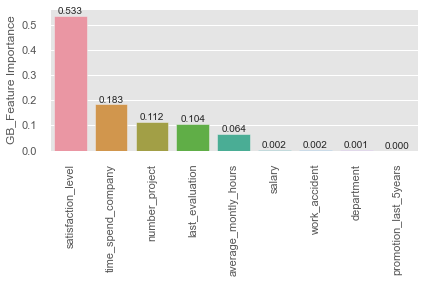

In [151]:
ax = sns.barplot(x=GB_fi.index, y='GB_Feature Importance', data=GB_fi)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.tight_layout()

#### Prediction GradientBoosting

In [152]:
y_pred = pipe_grad_model.predict(X_test)
y_train_pred = pipe_grad_model.predict(X_train)

In [153]:
Grad_f1 = f1_score(y_test, y_pred)
Grad_acc = accuracy_score(y_test, y_pred)
Grad_recall = recall_score(y_test, y_pred)
Grad_auc = roc_auc_score(y_test, y_pred)

In [154]:
Grad_Pred = {"Actual": y_test, "Grad_Pred": y_pred}
Grad_Pred = pd.DataFrame.from_dict(Grad_Pred)
Grad_Pred.head()

,Actual,Grad_Pred
2605,0,0
1396,1,0
6863,0,0
949,1,1
4982,0,1


In [155]:
Model_Preds.sample()

,Actual,Log_Pred
3094,0,0


In [156]:
Grad_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, Grad_Pred,
                       left_index=True, right_index=True)
Model_Preds.head()

,Actual,Log_Pred,Grad_Pred
2605,0,0,0
1396,1,1,0
6863,0,0,0
949,1,1,1
4982,0,1,1


## Distance Based Algorithm

## K-Neighbors Classifier Model 

In [157]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1
4,0.37,0.52,2,159,3,0,0,sales,0,1


In [158]:
X = df2.drop('left', axis=1)
y = df2['left']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=101)

In [160]:
operations = [('OrdinalEncoder', column_trans2), ("knn", KNeighborsClassifier(
    n_neighbors=5))]  
pipe_model_knn = Pipeline(steps=operations)

pipe_model_knn.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

In [161]:
print("Pipe_Model_KNN")
print("------------------")
eval_metric(pipe_model_knn, X_train, y_train, X_test, y_test)

Pipe_Model_KNN
------------------
Test_Set
[[2139  147]
 [  50  664]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.82      0.93      0.87       714

    accuracy                           0.93      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.94      0.93      0.94      3000


Train_Set
[[8724  418]
 [ 134 2723]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      9142
           1       0.87      0.95      0.91      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.95      0.94     11999
weighted avg       0.96      0.95      0.95     11999



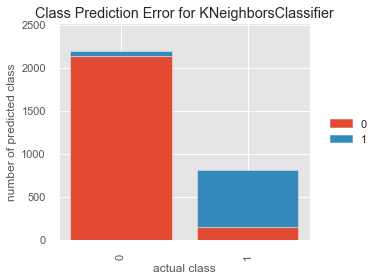

In [162]:
visualizer = ClassPredictionError(pipe_model_knn)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

In [163]:
test_error_rates = []


for k in range(1, 30):

    model = Pipeline(
        [("OrdinalEncoder", column_trans2), ("knn", KNeighborsClassifier(
            n_neighbors=k))])

    scores = cross_validate(model, X_train, y_train, scoring=[
                            'accuracy'], cv=10, error_score="raise")

    accuracy_mean = scores["test_accuracy"].mean()

    test_error = 1 - accuracy_mean
    test_error_rates.append(test_error)

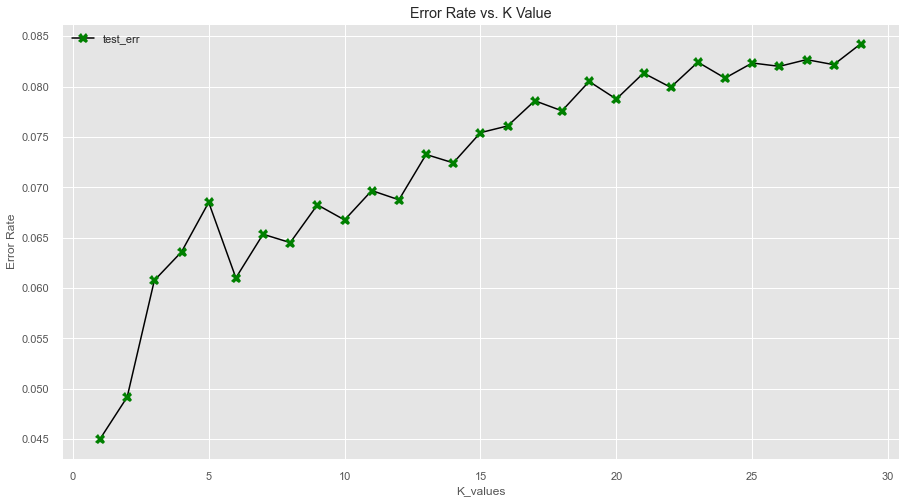

In [164]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(["test_err", "cv_test_err"])

In [165]:
test_error_rates = []
train_error_rates = []


for k in range(1, 30):

    operations = [("OrdinalEncoder", column_trans2), ("knn", KNeighborsClassifier(
        n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train, y_train)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=[
                            'accuracy'], cv=10, return_train_score=True)

    accuracy_test_mean = scores["test_accuracy"].mean()
    accuracy_train_mean = scores["train_accuracy"].mean()

    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

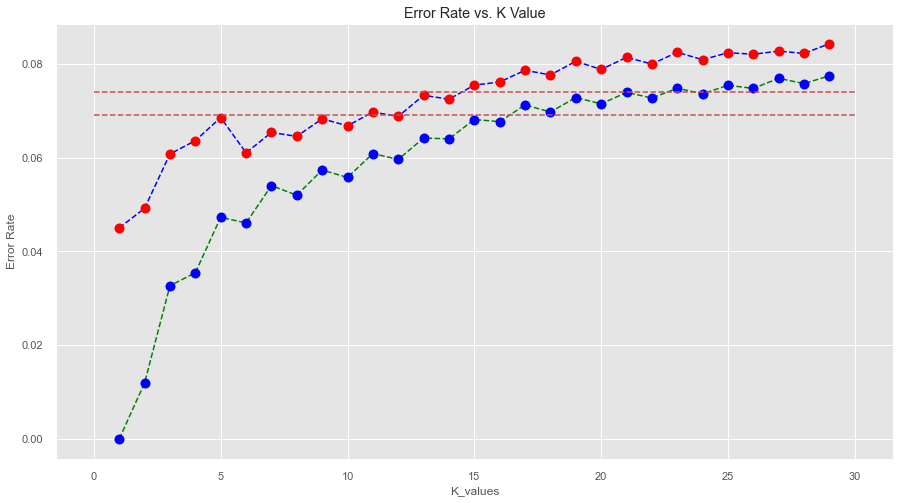

In [166]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1, 30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='r', linestyles="--")
plt.show()

In [167]:
# FIRST K=6
operations_knn = [("OrdinalEncoder", column_trans2), ("knn", KNeighborsClassifier(
    n_neighbors=6))]

knn6 = Pipeline(steps=operations_knn)
knn6.fit(X_train, y_train)
pred = knn6.predict(X_test)

print('WITH K=6')
print('---------------')
print(confusion_matrix(y_test, pred))
print('---------------')
print(classification_report(y_test, pred))

WITH K=6
---------------
[[2184  102]
 [  63  651]]
---------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2286
           1       0.86      0.91      0.89       714

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.95      0.94      0.95      3000



In [168]:
# NOW K=7
operations_knn = [("OrdinalEncoder", column_trans2), ("knn", KNeighborsClassifier(
    n_neighbors=7))]

knn7 = Pipeline(steps=operations_knn)
knn7.fit(X_train, y_train)
pred = knn7.predict(X_test)

print('WITH K=7')
print('---------------')
print(confusion_matrix(y_test, pred))
print('---------------')
print(classification_report(y_test, pred))

WITH K=7
---------------
[[2156  130]
 [  53  661]]
---------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.84      0.93      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [169]:
# NOW K=8
operations_knn = [("OrdinalEncoder", column_trans2), ("knn", KNeighborsClassifier(
    n_neighbors=8))]

knn8 = Pipeline(steps=operations_knn)
knn8.fit(X_train, y_train)
pred = knn8.predict(X_test)

print('WITH K=8')
print('---------------')
print(confusion_matrix(y_test, pred))
print('---------------')
print(classification_report(y_test, pred))

WITH K=8
---------------
[[2172  114]
 [  71  643]]
---------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.85      0.90      0.87       714

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



As seen above we are getting the best results with K=7

Cross Validation for K=7

In [170]:
operations = [("OrdinalEncoder", column_trans2), ("knn", KNeighborsClassifier(n_neighbors=7))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall',
                                                          'f1'], cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.272849,0.033999,0.949167,0.945180,0.875839,0.857143,0.915789,0.923795,0.895369,0.889222
2,0.020018,0.034009,0.927500,0.946014,0.805556,0.859415,0.915789,0.924572,0.857143,0.890804
3,0.024074,0.036028,0.938333,0.946291,0.850993,0.862132,0.898601,0.921820,0.874150,0.890977
4,0.020003,0.034999,0.937500,0.944995,0.832808,0.859585,0.923077,0.919098,0.875622,0.888346
5,0.018019,0.034343,0.935000,0.946477,0.848993,0.859877,0.884615,0.926099,0.866438,0.891760
6,0.023004,0.034337,0.930000,0.946384,0.815625,0.861919,0.912587,0.922598,0.861386,0.891227
7,0.020991,0.036005,0.946667,0.944439,0.860390,0.855135,0.926573,0.922987,0.892256,0.887767
8,0.019175,0.032827,0.924167,0.947032,0.801858,0.862532,0.905594,0.924932,0.850575,0.892643
9,0.018037,0.036042,0.930833,0.945365,0.818182,0.858747,0.912587,0.922209,0.862810,0.889347
10,0.018002,0.034009,0.927440,0.947778,0.807453,0.865623,0.912281,0.924184,0.856672,0.893945


In [171]:
df_scores.mean()[2:]

test_accuracy      0.934661
train_accuracy     0.945995
test_precision     0.831770
train_precision    0.860211
test_recall        0.910750
train_recall       0.923229
test_f1            0.869242
train_f1           0.890604
dtype: float64

## Evaluating ROC Curves and AUC

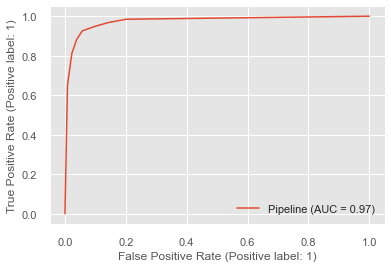

In [172]:
plot_roc_curve(knn7, X_test, y_test);

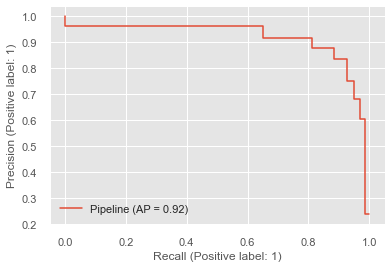

In [173]:
plot_precision_recall_curve(knn7, X_test, y_test)

Prediction KNN

In [174]:
y_pred_proba = knn7.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))
print(average_precision_score(y_test, y_pred_proba[:,1]))

0.9743494073044792
0.9152330497247353


In [175]:
KNN_f1 = f1_score(y_test, y_pred)
KNN_acc = accuracy_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_auc = roc_auc_score(y_test, y_pred)

In [176]:
KNN_Pred = {"Actual": y_test, "KNN_Pred": y_pred}
KNN_Pred = pd.DataFrame.from_dict(KNN_Pred)
KNN_Pred.head()

,Actual,KNN_Pred
2605,0,0
1396,1,0
6863,0,0
949,1,1
4982,0,1


In [177]:
KNN_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, KNN_Pred,
                       left_index=True, right_index=True)
Model_Preds.head()

,Actual,Log_Pred,Grad_Pred,KNN_Pred
2605,0,0,0,0
1396,1,1,0,0
6863,0,0,0,0
949,1,1,1,1
4982,0,1,1,1


### #Random Forest Classifier

#### Model Building

In [178]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,0,1
1,0.80,0.86,5,262,6,0,0,sales,1,1
2,0.11,0.88,7,272,4,0,0,sales,1,1
3,0.72,0.87,5,223,5,0,0,sales,0,1
4,0.37,0.52,2,159,3,0,0,sales,0,1


In [179]:
X = df2.drop('left', axis=1)
y = df2['left']


In [180]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=101)

In [181]:
operations_rf = [("OrdinalEncoder", column_trans2),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

In [182]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[2282    4]
 [  23  691]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9142    0]
 [   0 2857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



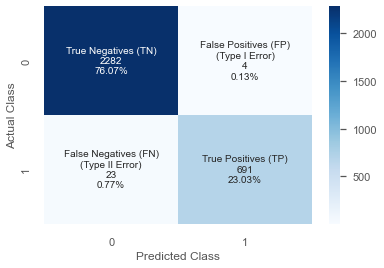

In [183]:
y_pred = pipe_model_rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives (TN)", "False Positives (FP)\n(Type I Error)",
               "False Negatives (FN)\n(Type II Error)", "True Positives (TP)"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel="Actual Class")
plt.show()

Cross Validation RF

In [184]:
model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring=scoring,
                        cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
round((df_scores.mean()[2:]), 3)

test_precision_churn     0.995
train_precision_churn    1.000
test_recall_churn        0.970
train_recall_churn       1.000
test_f1_churn            0.982
train_f1_churn           1.000
dtype: float64

Random Forest Classifier GridSearchCV

In [185]:
operations_rf = [("OrdinalEncoder", column_trans2),
                 ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_rf_grid = Pipeline(steps=operations_rf)
pipe_rf_grid

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [186]:
pipe_rf_grid.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['department'], dtype='object'))])),
  ('RF_model',
   RandomForestClassifier(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  Index(['department'], dtype='object'))]),
 'RF_model': RandomForestClassifier(class_weight='balanced', random_state=101),
 'OrdinalEncoder__n_jobs': None,
 'OrdinalEncoder__remainder': 'passthrough',
 'OrdinalE

In [187]:
param_grid = {'RF_model__n_estimators': [50, 100, 200],
              'RF_model__max_features': ['sqrt', None, 15],
              'RF_model__max_depth': [None, 2, 3],
              'RF_model__min_samples_split': [2, 3, 4]}

In [188]:
RF_grid_model = GridSearchCV(estimator=pipe_rf_grid,
                             param_grid=param_grid,
                             scoring=recall_churn,
                             n_jobs=-1, verbose=2)
RF_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['department'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [None, 2, 3],
                         'RF_model__max_features': ['sqrt', None, 15],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=2)

In [189]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=50, random_state=101))])

In [190]:
print('Best Parameters of GridSearchCV for Random Forest Model:', RF_grid_model.best_params_)


Best Parameters of GridSearchCV for Random Forest Model: {'RF_model__max_depth': None, 'RF_model__max_features': 'sqrt', 'RF_model__min_samples_split': 2, 'RF_model__n_estimators': 50}


In [191]:
operations_tuned_rf = [("OrdinalEncoder", column_trans2),
                       ("RF_tuned", RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_split= 2, n_estimators= 50))]

rf_tuned = Pipeline(steps=operations_tuned_rf)
rf_tuned

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('RF_tuned', RandomForestClassifier(n_estimators=50))])

In [192]:
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('RF_tuned', RandomForestClassifier(n_estimators=50))])

In [193]:
y_pred = rf_tuned.predict(X_test)
y_train_pred = rf_tuned.predict(X_train)

RF_tuned_f1 = f1_score(y_test, y_pred)
RF_tuned_acc = accuracy_score(y_test, y_pred)
RF_tuned_recall = recall_score(y_test, y_pred)
RF_tuned_auc = roc_auc_score(y_test, y_pred)

In [194]:
print("RF_tuned")
print("------------------")
eval_metric(rf_tuned, X_train, y_train, X_test, y_test)

RF_tuned
------------------
Test_Set
[[2281    5]
 [  23  691]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9141    1]
 [   1 2856]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



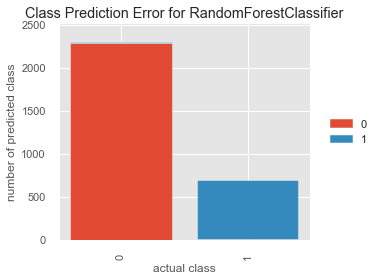

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [195]:
visualizer = ClassPredictionError(rf_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof()

Random Forest overfitted

## Evaluating ROC Curves and AUC

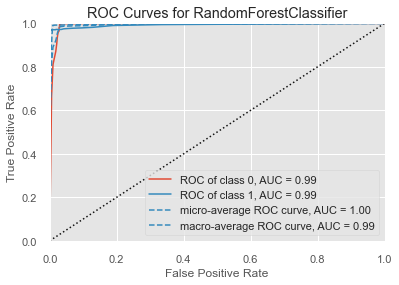

In [196]:
model = rf_tuned
visualizer = ROCAUC(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

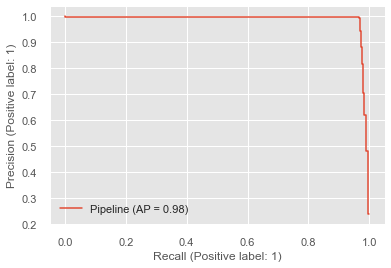

In [197]:
plot_precision_recall_curve(rf_tuned, X_test, y_test);

In [198]:
y_pred = rf_tuned.predict(X_test)
y_pred_proba = rf_tuned.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9925753766073357

In [199]:
pipe_rf_f1 = f1_score(y_test, y_pred)
pipe_rf_acc = accuracy_score(y_test, y_pred)
pipe_rf_recall = recall_score(y_test, y_pred)
pipe_rf_auc = roc_auc_score(y_test, y_pred)

#### Prediction

In [200]:
print('RF Predictions:')
RF_Pred = {"Actual": y_test, "RF Predictions": y_pred}
RF_Pred = pd.DataFrame.from_dict(RF_Pred)
RF_Pred.head()

RF Predictions:


,Actual,RF Predictions
2605,0,0
1396,1,0
6863,0,0
949,1,1
4982,0,0


In [201]:
RF_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, RF_Pred, 
                       left_index=True, right_index=True)
Model_Preds.head()

,Actual,Log_Pred,Grad_Pred,KNN_Pred,RF Predictions
2605,0,0,0,0,0
1396,1,1,0,0,0
6863,0,0,0,0,0
949,1,1,1,1,1
4982,0,1,1,1,0


RF Feature Importance

In [202]:
rf_tuned['RF_tuned'].feature_importances_

array([0.01256433, 0.36974459, 0.11285191, 0.15757554, 0.13195954,
       0.19930504, 0.00613814, 0.00125118, 0.00860973])

In [203]:
features_rf = rf_tuned['OrdinalEncoder'].get_feature_names_out()
features_rf

array(['ordinalencoder__department', 'remainder__satisfaction_level',
       'remainder__last_evaluation', 'remainder__number_project',
       'remainder__average_montly_hours', 'remainder__time_spend_company',
       'remainder__work_accident', 'remainder__promotion_last_5years',
       'remainder__salary'], dtype=object)

In [204]:
pd.DataFrame(rf_tuned['OrdinalEncoder'].fit_transform(X_train), columns=features_rf).head()

,ordinalencoder__department,remainder__satisfaction_level,remainder__last_evaluation,remainder__number_project,remainder__average_montly_hours,remainder__time_spend_company,remainder__work_accident,remainder__promotion_last_5years,remainder__salary
0,9.0,0.70,0.66,4.0,168.0,3.0,0.0,0.0,0.0
1,2.0,0.33,0.95,4.0,280.0,3.0,0.0,0.0,1.0
2,7.0,0.69,0.66,3.0,215.0,6.0,0.0,0.0,2.0
3,9.0,0.50,0.67,2.0,142.0,3.0,0.0,0.0,0.0
4,5.0,0.88,0.68,5.0,157.0,4.0,1.0,0.0,1.0


In [205]:
nf = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
nf

['department',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'salary']

In [206]:
RF_fi = pd.DataFrame(data=rf_tuned['RF_tuned'].feature_importances_, index=nf, columns=["RF_Feature Importance"]).sort_values("RF_Feature Importance", ascending=False)
RF_fi

,RF_Feature Importance
satisfaction_level,0.369745
time_spend_company,0.199305
number_project,0.157576
average_montly_hours,0.131960
last_evaluation,0.112852
department,0.012564
salary,0.008610
work_accident,0.006138
promotion_last_5years,0.001251


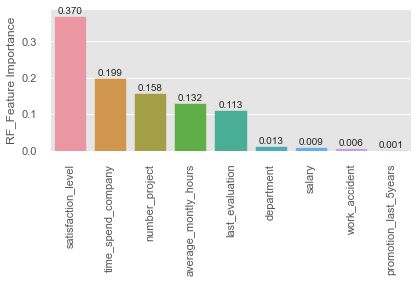

In [207]:
ax = sns.barplot(x=RF_fi.index, y='RF_Feature Importance', data=RF_fi)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.tight_layout()

### #XGBoost Classifier

#### Model Building

In [208]:
operations_xgb = [("OrdinalEncoder", column_trans2),
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

In [209]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced', y=y_train)
classes_weights

array([0.65625684, 0.65625684, 0.65625684, ..., 0.65625684, 2.09993   ,
       0.65625684])

In [210]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index=y_train.index)

comp["label"] = y_train
comp.head()

,weights,label
9355,0.656257,0
8808,0.656257,0
11737,0.656257,0
8741,0.656257,0
2143,0.656257,0


In [211]:
comp.groupby("label")["weights"].value_counts()

label  weights 
0      0.656257    9142
1      2.099930    2857
Name: weights, dtype: int64

In [212]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

In [213]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[2212   74]
 [  35  679]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.90      0.95      0.93       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[8921  221]
 [ 175 2682]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9142
           1       0.92      0.94      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.95      0.96      0.95     11999
weighted avg       0.97      0.97      0.97     11999



Cross Validation

In [214]:
model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight": classes_weights})
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_precision_churn     0.922285
train_precision_churn    0.928021
test_recall_churn        0.936302
train_recall_churn       0.940847
test_f1_churn            0.929143
train_f1_churn           0.934389
dtype: float64

## Gridsearch

In [215]:
param_grid = {"XGB_model__n_estimators": [50, 100, 150],
              'XGB_model__max_depth': [1, 2, 3],
              "XGB_model__learning_rate": [0.05, 0.1, 0.15],
              "XGB_model__subsample": [0.8, 1],
              "XGB_model__colsample_bytree": [0.8, 1]}

In [216]:
model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring=recall_churn,
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [217]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['department'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.05, 0.1, 0.15],
                         'XGB_model__max_depth': [1, 2, 3],
                         'XGB_model__n_estimators': [50, 100, 150],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=1))

In [218]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.05,
                               max_depth=1, n_estimators=50, random_state=101,
                               subsample=0.8))])

In [219]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 50,
 'XGB_model__subsample': 0.8}

Model Fitting with Best Parameters

In [220]:
operations_xgb = [("OrdinalEncoding", column_trans2), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                                                                max_depth=1, n_estimators=20, random_state=101,
                                                                                subsample=0.8))]

XGB_last = Pipeline(steps=operations_xgb)

XGB_last.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.05,
                               max_depth=1, n_estimators=20, random_state=101,
                               subsample=0.8))])

In [221]:
eval_metric(XGB_last, X_train, y_train, X_test, y_test)

Test_Set
[[1968  318]
 [ 181  533]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2286
           1       0.63      0.75      0.68       714

    accuracy                           0.83      3000
   macro avg       0.77      0.80      0.78      3000
weighted avg       0.85      0.83      0.84      3000


Train_Set
[[7808 1334]
 [ 859 1998]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      9142
           1       0.60      0.70      0.65      2857

    accuracy                           0.82     11999
   macro avg       0.75      0.78      0.76     11999
weighted avg       0.83      0.82      0.82     11999



In [222]:
y_pred = pipe_model_xgb.predict(X_test)
y_pred_proba = pipe_model_xgb.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

## Evaluating ROC Curves and AUC

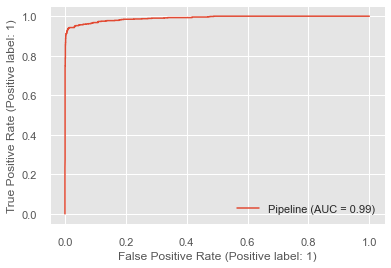

In [223]:
plot_roc_curve(pipe_model_xgb, X_test, y_test);

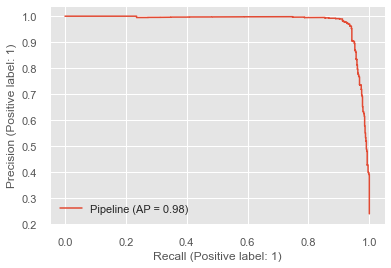

In [224]:
plot_precision_recall_curve(pipe_model_xgb, X_test, y_test);

#### Prediction

In [225]:
print('XGB Predictions:')
XGB_Pred = {"Actual": y_test, "XGB Predictions": y_pred}
XGB_Pred = pd.DataFrame.from_dict(XGB_Pred)
XGB_Pred.head()

XGB Predictions:


,Actual,XGB Predictions
2605,0,0
1396,1,0
6863,0,0
949,1,1
4982,0,1


In [226]:
XGB_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, XGB_Pred,
                       left_index=True, right_index=True)
Model_Preds.head()

,Actual,Log_Pred,Grad_Pred,KNN_Pred,RF Predictions,XGB Predictions
2605,0,0,0,0,0,0
1396,1,1,0,0,0,0
6863,0,0,0,0,0,0
949,1,1,1,1,1,1
4982,0,1,1,1,0,1


In [227]:
Model_Preds.sample(5)

,Actual,Log_Pred,Grad_Pred,KNN_Pred,RF Predictions,XGB Predictions
11774,0,1,0,0,0,0
966,1,1,1,1,1,1
2132,0,0,0,0,0,0
3923,0,0,0,0,0,0
2020,0,0,0,0,0,0


XGB Feature Importance

In [228]:
pipe_model_xgb['XGB_model'].feature_importances_

array([0.01206782, 0.3256624 , 0.10048754, 0.08692801, 0.06284638,
       0.32168993, 0.0546271 , 0.        , 0.03569081], dtype=float32)

In [229]:
features_xgb = pipe_model_xgb['OrdinalEncoder'].get_feature_names_out()
features_xgb

array(['ordinalencoder__department', 'remainder__satisfaction_level',
       'remainder__last_evaluation', 'remainder__number_project',
       'remainder__average_montly_hours', 'remainder__time_spend_company',
       'remainder__work_accident', 'remainder__promotion_last_5years',
       'remainder__salary'], dtype=object)

In [230]:
pd.DataFrame(pipe_model_xgb["OrdinalEncoder"].fit_transform(
    X_train), columns=features_xgb).head()

,ordinalencoder__department,remainder__satisfaction_level,remainder__last_evaluation,remainder__number_project,remainder__average_montly_hours,remainder__time_spend_company,remainder__work_accident,remainder__promotion_last_5years,remainder__salary
0,9.0,0.70,0.66,4.0,168.0,3.0,0.0,0.0,0.0
1,2.0,0.33,0.95,4.0,280.0,3.0,0.0,0.0,1.0
2,7.0,0.69,0.66,3.0,215.0,6.0,0.0,0.0,2.0
3,9.0,0.50,0.67,2.0,142.0,3.0,0.0,0.0,0.0
4,5.0,0.88,0.68,5.0,157.0,4.0,1.0,0.0,1.0


In [231]:
nf_xgb = [i.replace("ordinalencoder__", "").replace(
    "remainder__", "") for i in features]
nf_xgb

['department',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'salary']

In [232]:
XGB_fi = pd.DataFrame(data=pipe_model_xgb["XGB_model"].feature_importances_, index=nf_xgb,  # index=X.columns
                      columns=["XGB_Feature Importance"]).sort_values("XGB_Feature Importance", ascending=False)
XGB_fi

,XGB_Feature Importance
satisfaction_level,0.325662
time_spend_company,0.321690
last_evaluation,0.100488
number_project,0.086928
average_montly_hours,0.062846
work_accident,0.054627
salary,0.035691
department,0.012068
promotion_last_5years,0.000000


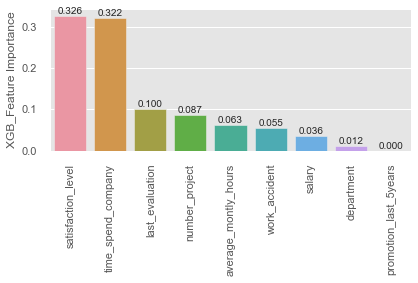

In [233]:
ax = sns.barplot(x=XGB_fi.index, y='XGB_Feature Importance', data=XGB_fi)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.tight_layout()

### #ANN Classifier

#### Layer Architecture Building and Compiling

In [234]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left,pred_clusters
0,0.38,0.53,2,157,3,0,0,sales,0,1,3


In [235]:
X = df.drop('left', axis=1)
y = df['left']

In [236]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  int64  
 9   pred_clusters          14999 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 1.1+ MB


In [240]:
label_encoder = preprocessing.LabelEncoder()
X['department']= label_encoder.fit_transform(X['department']) 

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=101)

In [242]:
scaler = MinMaxScaler()

In [243]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [244]:
X_train.shape

(13499, 10)

In [245]:
seed = 101

In [246]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
# 0,5 ne kadar oranla süzgec gecirecek nöronlari, bu katmanin random olarak %50 sini gecir %50 sini bloke et
#model.add(Dropout(0.25))

model.add(Dense(8, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(8, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(4, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [247]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto",
                           verbose=1, patience=10, restore_best_weights=True)

In [248]:
train_classes = y_train
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_classes),
    y=train_classes
)
class_weights = dict(zip(np.unique(train_classes), class_weights)),
print("class_weights : ", class_weights)

class_weights :  ({0: 0.6562469615945552, 1: 2.100031113876789},)


In [249]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=32, epochs=1000, verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7747 - val_loss: 0.3885 - val_accuracy: 0.8659
Epoch 2/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8928 - val_loss: 0.2424 - val_accuracy: 0.8981
Epoch 3/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.9250 - val_loss: 0.2059 - val_accuracy: 0.9267
Epoch 4/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 0.9361 - val_loss: 0.1831 - val_accuracy: 0.9385
Epoch 5/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.1807 - accuracy: 0.9444 - val_loss: 0.1805 - val_accuracy: 0.9374
Epoch 6/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.1741 - accuracy: 0.9480 - val_loss: 0.1680 - val_accuracy: 0.9470
Epoch 7/1000
338/338 [==============================] - 1s 2ms/step - loss: 0.1657 - accuracy: 0.9512 - val_loss: 0.1629 - val_accuracy:

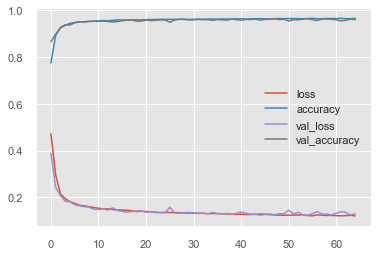

In [250]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [251]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)


loss :  0.10056143254041672
accuracy :  0.9713333249092102


#### Evaluating Model Performance and Tunning

In [252]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


47/47 [==============================] - 0s 978us/step
[[1122   21]
 [  22  335]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1143
           1       0.94      0.94      0.94       357

    accuracy                           0.97      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.97      0.97      0.97      1500



Cross Validation

In [253]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(
        optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [254]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, batch_size=32, epochs=100, verbose=0)

scores = cross_validate(estimator=classifier_model, X=X_train, y=y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores

43/43 [==============================] - 0s 959us/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.968148,0.976821,0.891239,0.932070
2,0.960741,0.954545,0.882883,0.917317
3,0.964444,0.926174,0.913907,0.920000
4,0.974815,0.987138,0.910979,0.947531
5,0.958519,0.914474,0.902597,0.908497
6,0.972593,0.972125,0.905844,0.937815
7,0.931852,0.990654,0.701987,0.821705
8,0.965185,0.929448,0.926606,0.928025
9,0.966667,0.963087,0.894081,0.927302
10,0.963677,0.974359,0.881159,0.925419


In [255]:
df_scores_summary = pd.DataFrame({"score_mean": df_scores.mean().values, "score_std": df_scores.std().values},
                                 index=["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.962664,0.011894
pre,0.958883,0.026852
rec,0.881128,0.064524
f1,0.916568,0.035042


## GridSearchCV

In [256]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [257]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=5, restore_best_weights=True)


In [258]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, validation_split=0.1, epochs=200)


In [259]:
classifier_model.get_params()

{'validation_split': 0.1,
 'epochs': 200,
 'build_fn': <function __main__.build_classifier(optimizer, learn_rate)>}

In [260]:
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, Adadelta, Nadam],
              'learn_rate': [0.001, 0.005]}

grid_model = GridSearchCV(estimator=classifier_model,
                          param_grid=parameters,
                          scoring='accuracy', n_jobs=-1,
                          cv=3, # cross validation minimum 3 ideal 5 
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks=[early_stop])


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1/200
380/380 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.8650 - val_loss: 0.1728 - val_accuracy: 0.9526
Epoch 2/200
380/380 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9441 - val_loss: 0.1582 - val_accuracy: 0.9519
Epoch 3/200
380/380 [==============================] - 1s 2ms/step - loss: 0.1565 - accuracy: 0.9529 - val_loss: 0.1554 - val_accuracy: 0.9533
Epoch 4/200
380/380 [==============================] - 1s 2ms/step - loss: 0.1509 - accuracy: 0.9559 - val_loss: 0.1615 - val_accuracy: 0.9556
Epoch 5/200
380/380 [==============================] - 1s 2ms/step - loss: 0.1458 - accuracy: 0.9572 - val_loss: 0.1427 - val_accuracy: 0.9541
Epoch 6/200
380/380 [==============================] - 1s 1ms/step - loss: 0.1431 - accuracy: 0.9593 - val_loss: 0.1800 - val_accuracy: 0.9393
Epoch 7/200
380/380 [==============================] - 1s 2ms/step - loss: 0.1382

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027AB3C29CF0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'learn_rate': [0.001, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [261]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [262]:
y_pred = grid_model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 935us/step
[[1129   14]
 [  21  336]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1143
           1       0.96      0.94      0.95       357

    accuracy                           0.98      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



47/47 [==============================] - 0s 1ms/step


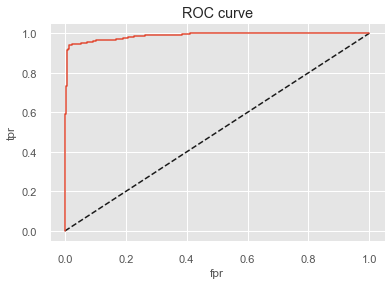

In [263]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

#### Prediction

47/47 [==============================] - 0s 1ms/step


## Comparing Models

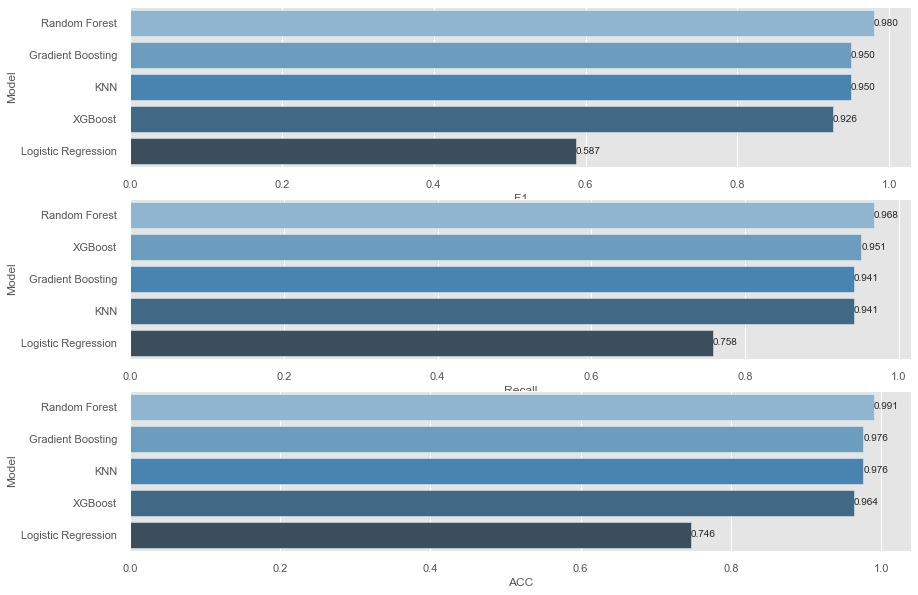

In [265]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Gradient Boosting",  "KNN", "Random Forest", "XGBoost"],
                        "F1": [LOG_tuned_f1, Grad_f1, KNN_f1, pipe_rf_f1, xgb_f1],
                        "Recall": [LOG_tuned_recall, Grad_recall, KNN_recall, pipe_rf_recall, xgb_recall],
                        "ACC": [LOG_tuned_acc, Grad_acc, KNN_acc, pipe_rf_acc, xgb_acc]})


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="ACC", ascending=False)
ax = sns.barplot(x="ACC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show()


Model and Feature Selection

In [266]:
pd.concat([GB_fi, RF_fi, XGB_fi], axis=1)

,GB_Feature Importance,RF_Feature Importance,XGB_Feature Importance
satisfaction_level,0.533408,0.369745,0.325662
time_spend_company,0.182872,0.199305,0.321690
number_project,0.111825,0.157576,0.086928
last_evaluation,0.103915,0.112852,0.100488
average_montly_hours,0.064238,0.131960,0.062846
salary,0.001584,0.008610,0.035691
work_accident,0.001557,0.006138,0.054627
department,0.000600,0.012564,0.012068
promotion_last_5years,0.000000,0.001251,0.000000


In [267]:
X_new = df2[['satisfaction_level', 'time_spend_company',
             'number_project', 'last_evaluation', 'average_montly_hours']]
X_new.head()

,satisfaction_level,time_spend_company,number_project,last_evaluation,average_montly_hours
0,0.38,3,2,0.53,157
1,0.80,6,5,0.86,262
2,0.11,4,7,0.88,272
3,0.72,5,5,0.87,223
4,0.37,3,2,0.52,159


In [268]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=101)

In [269]:
operations_final = [('scaler', MinMaxScaler()), ("XGB_model", XGBClassifier(random_state=101))]
pipe_model_final = Pipeline(steps=operations_final)
pipe_model_final

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('XGB_model', XGBClassifier(random_state=101))])

In [270]:
pipe_model_final.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('XGB_model', XGBClassifier(random_state=101))])

In [271]:
eval_metric(pipe_model_final, X_train, y_train, X_test, y_test)

Test_Set
[[2238   24]
 [  49  689]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2262
           1       0.97      0.93      0.95       738

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9075   91]
 [ 221 2612]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9166
           1       0.97      0.92      0.94      2833

    accuracy                           0.97     11999
   macro avg       0.97      0.96      0.96     11999
weighted avg       0.97      0.97      0.97     11999



In [272]:
model = Pipeline(steps=operations_final)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight": classes_weights})
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]


test_precision_churn     0.964871
train_precision_churn    0.966965
test_recall_churn        0.919885
train_recall_churn       0.922080
test_f1_churn            0.941768
train_f1_churn           0.943985
dtype: float64

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

In [273]:
pickle.dump(pipe_model_final, open("xgb_model_final", 'wb'))

In [ ]:
Capstone_2_model = pickle.dump(pipe_model_final, open("xgb_model_final", 'wb'))

In [ ]:
# categorik sütun olsaydi
# pickle.dump(column_trans2, open('transformer', 'wb'))

In [ ]:
# Capstone_2_transformer = pickle.dump(column_trans2, open('transformer', 'wb'))

In [ ]:
scaler = MinMaxScaler()
scaler_fitted = scaler.fit(X_new)
scaler_deploy = pickle.dump(scaler_fitted, open('scaler.sav', 'wb'))

In [ ]:
X_new.info()

In [ ]:
for col in X_new.columns:
    print(col, "min_value:", X_new[col].min(), "max_value:", X_new[col].max())

### Save and Export Variables


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___